In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from scipy.stats import skew, norm

In [184]:
df_train=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\train.csv")
test=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\test.csv")
print('train',df_train.shape)
print('test',test.shape)

train (1460, 81)
test (1459, 80)


In [185]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [186]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [187]:
df_train=df_train.drop(["Id"],axis=1)
test=test.drop(["Id"],axis=1)


In [188]:
print("training data has {} shape  ".format(df_train.shape))
print("test data has {} shape  ".format(test.shape))

training data has (1460, 80) shape  
test data has (1459, 79) shape  


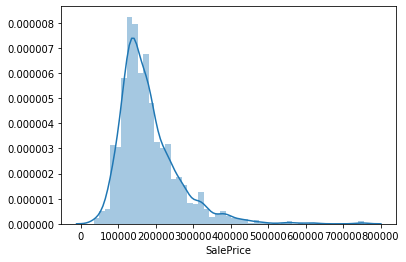

Skewness: 1.8828757597682129


In [189]:
sns.distplot(df_train['SalePrice'])
plt.show()
print('Skewness: '+ str(df_train['SalePrice'].skew()))

In [190]:
#log transform the target:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

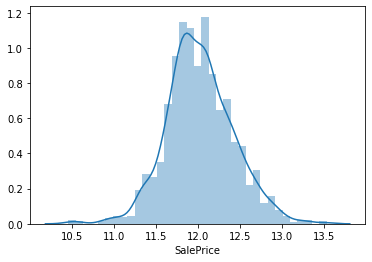

Skewness: 0.12134661989685333


In [191]:
sns.distplot(df_train['SalePrice'])
plt.show()
print('Skewness: '+ str(df_train['SalePrice'].skew()))

# Removing the Outliers

In [192]:
numerical=df_train.select_dtypes(exclude=['object'])
print("numerical columns",len(numerical.columns))
categorical=df_train.select_dtypes(include=['object'])
print("categorical",len(categorical.columns))

numerical columns 37
categorical 43


Univariate analysis for detecting outliers

we use boxplot for detecting outliers in contious data 

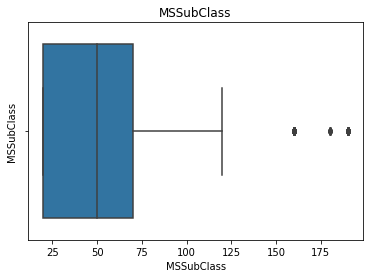

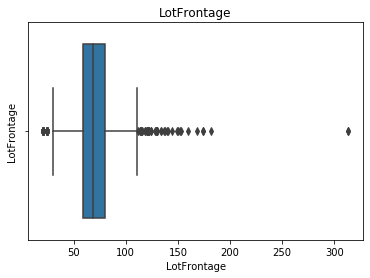

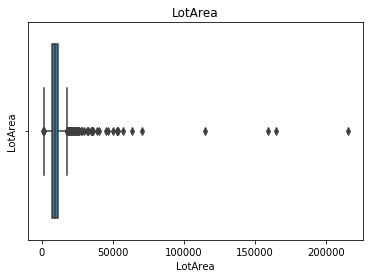

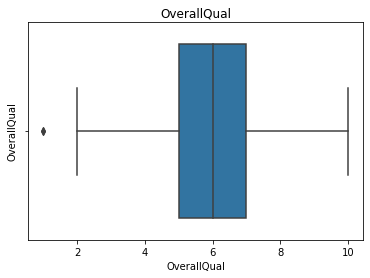

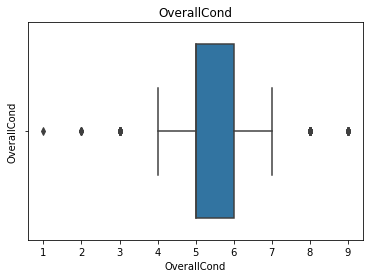

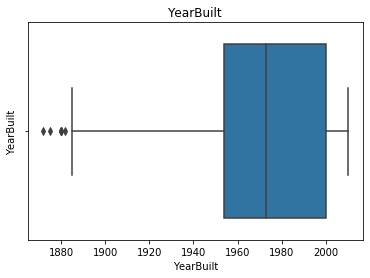

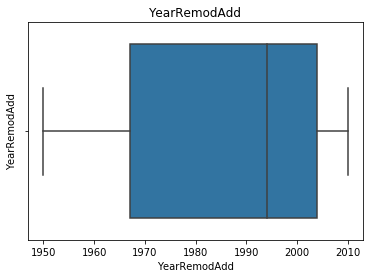

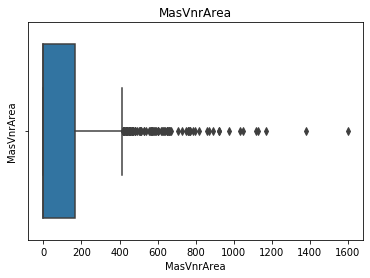

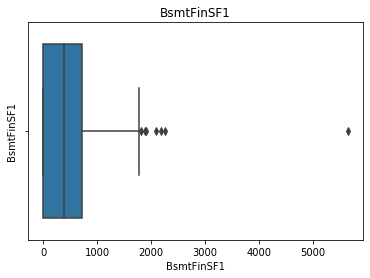

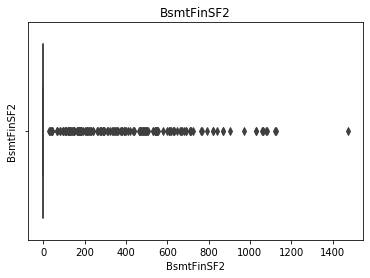

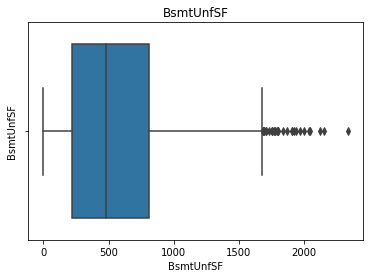

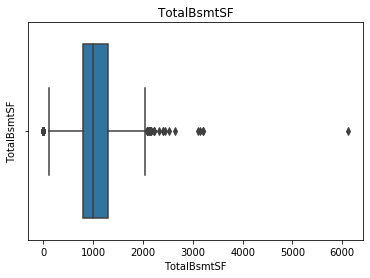

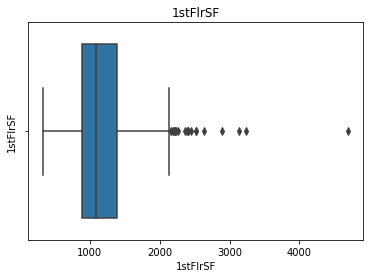

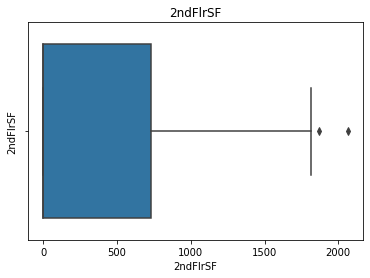

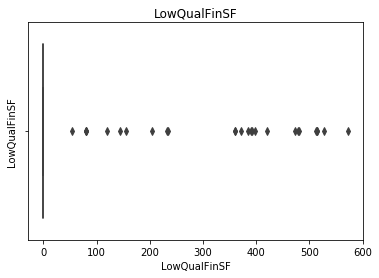

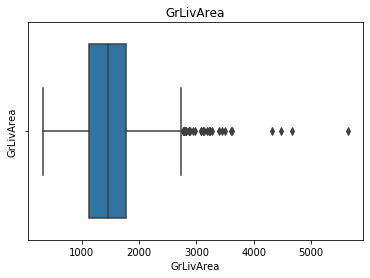

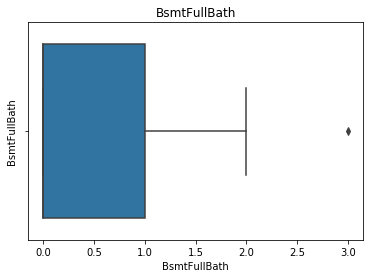

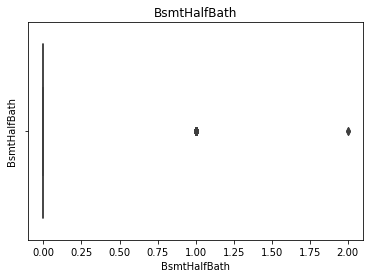

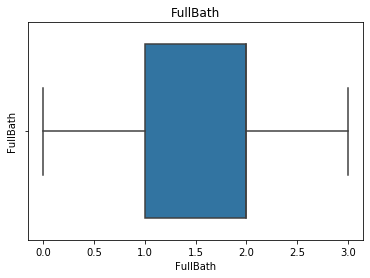

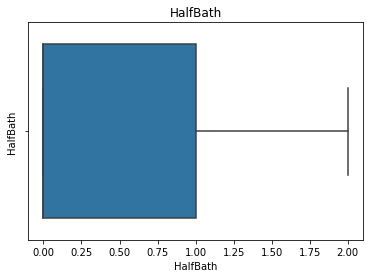

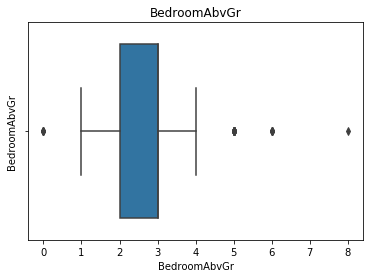

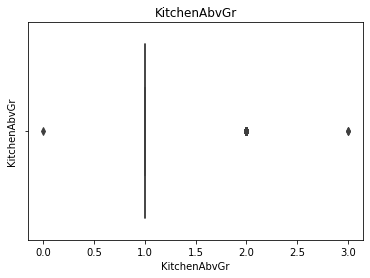

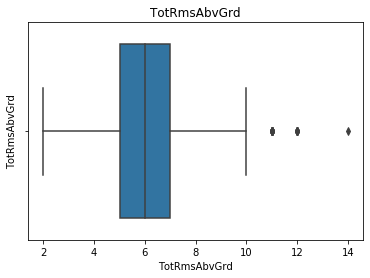

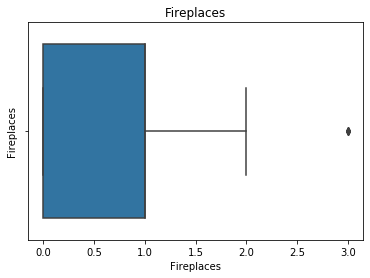

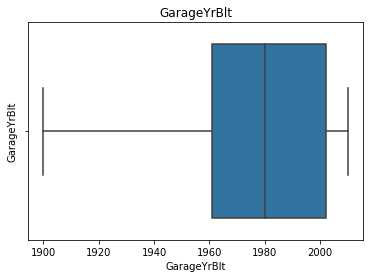

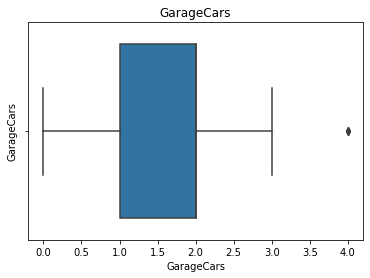

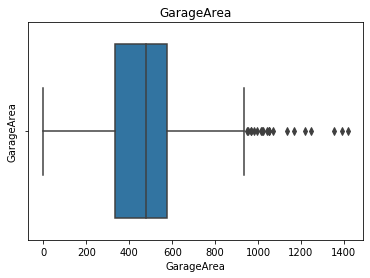

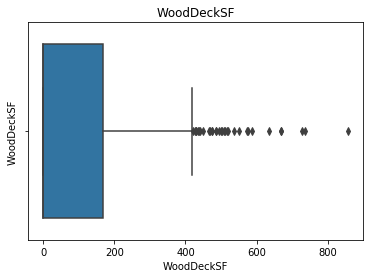

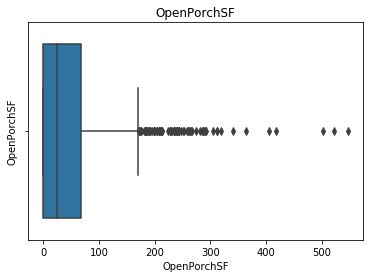

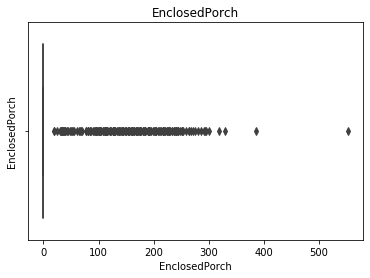

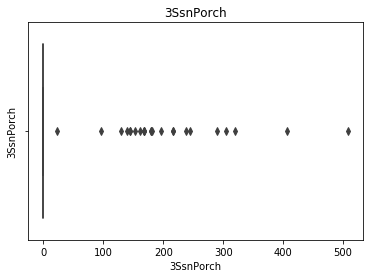

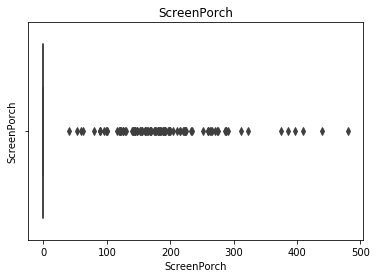

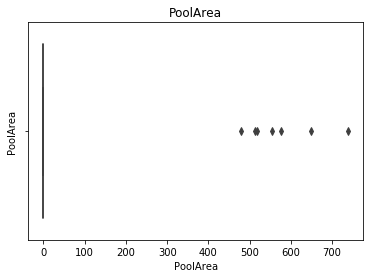

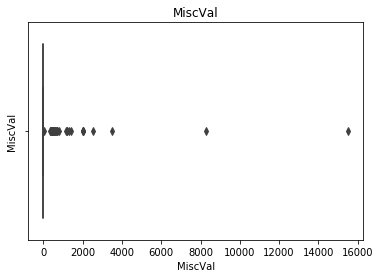

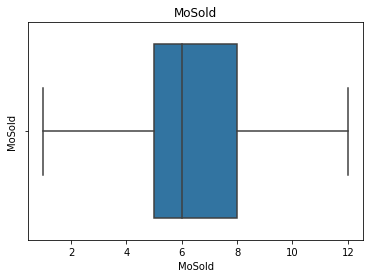

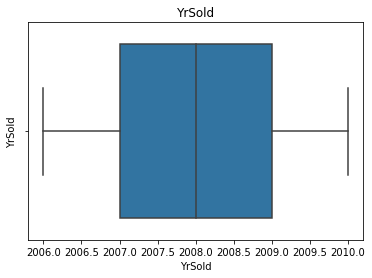

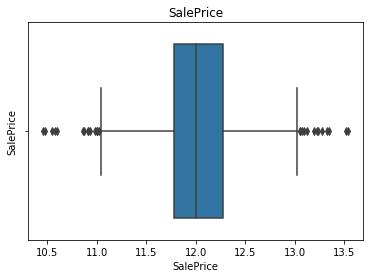

In [193]:
for feature in numerical:
    sns.boxplot(x=df_train[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [194]:
numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

we use scatterplot for detecting outliers in contious data with respect to the target variable as a part of multivariate analysis

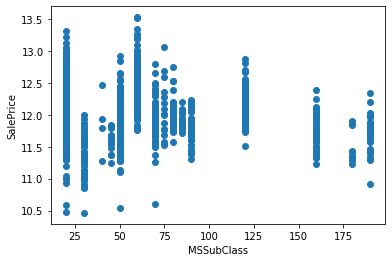

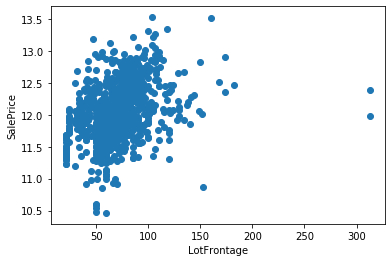

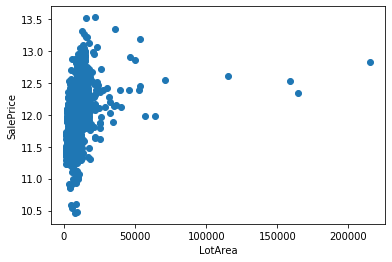

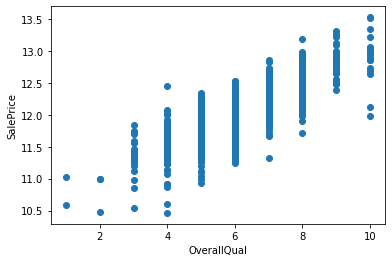

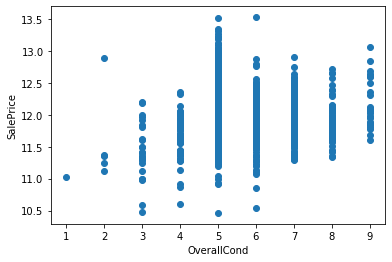

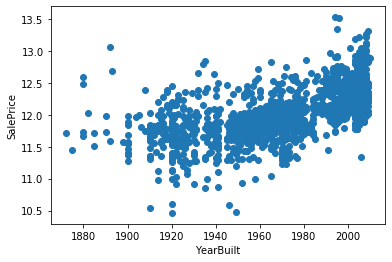

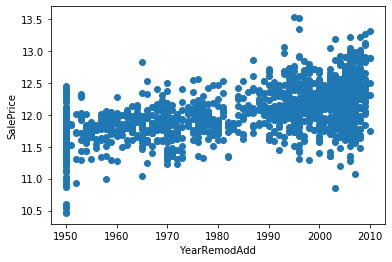

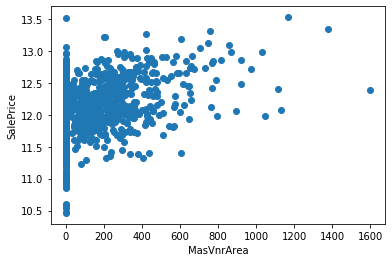

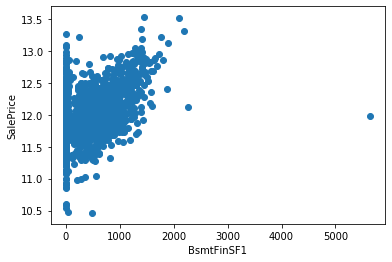

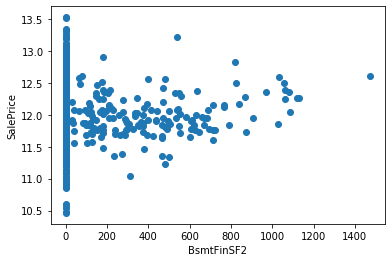

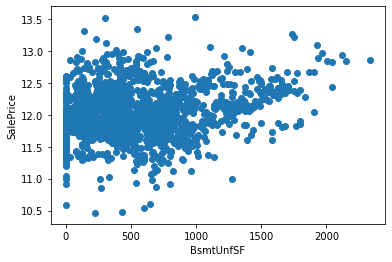

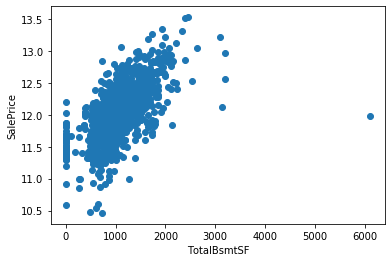

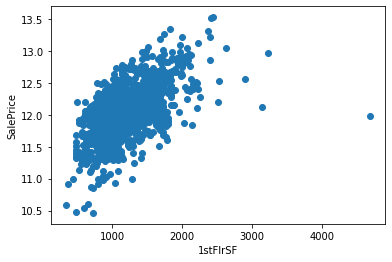

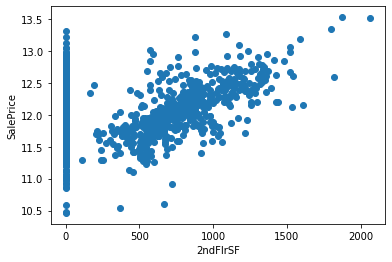

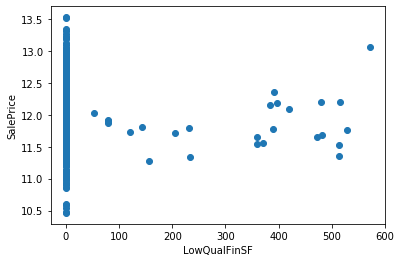

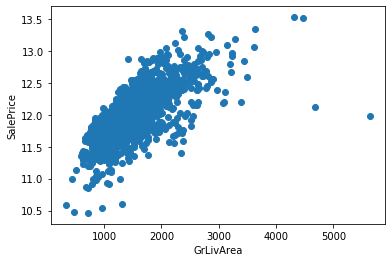

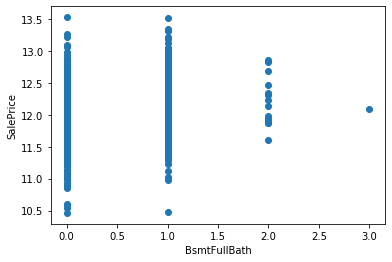

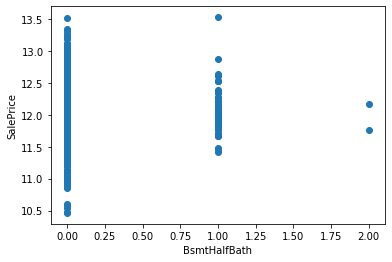

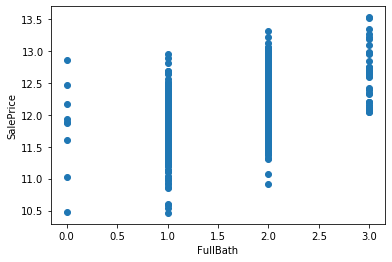

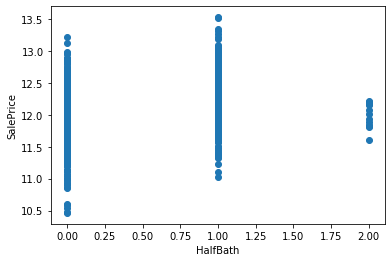

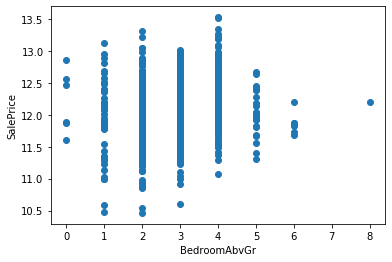

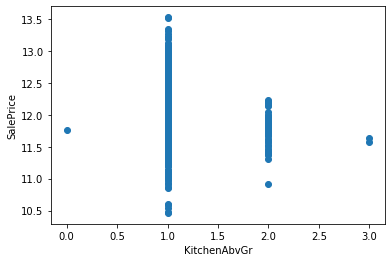

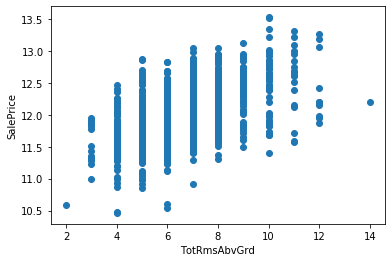

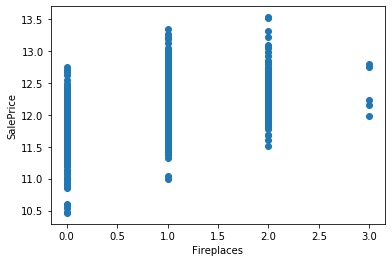

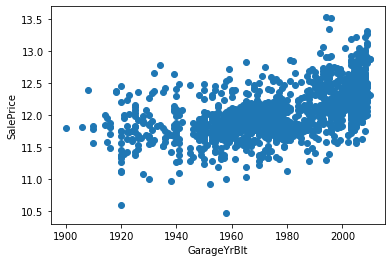

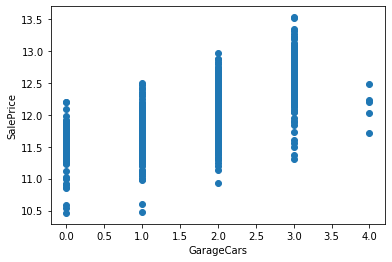

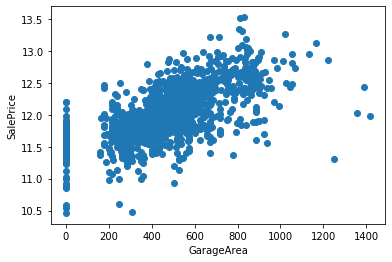

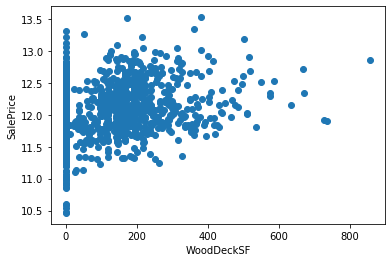

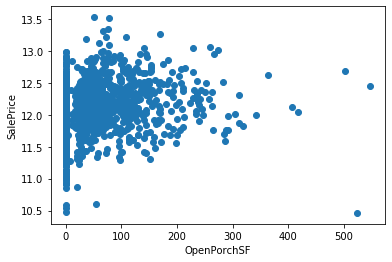

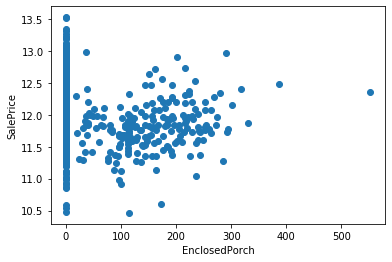

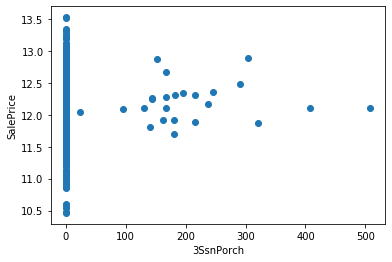

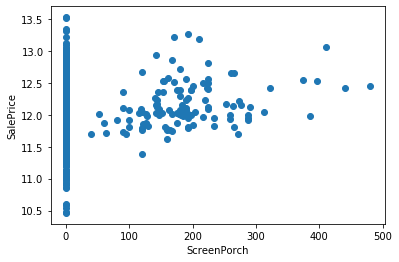

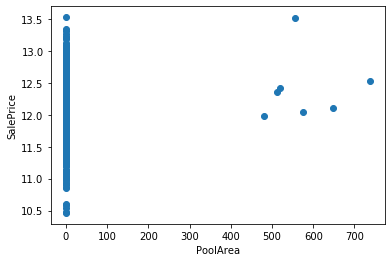

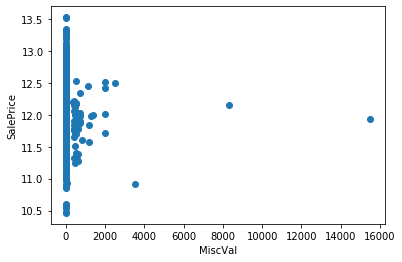

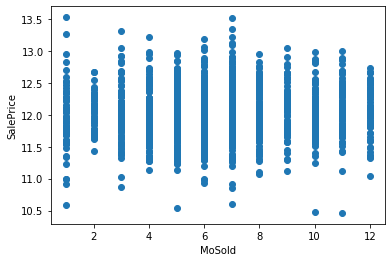

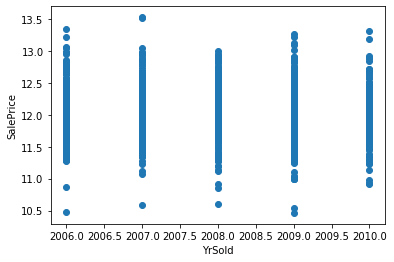

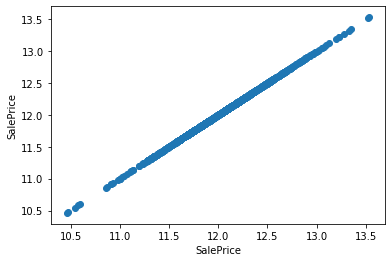

In [195]:
for feature in numerical:
        plt.scatter(df_train[feature],df_train["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Dividing the numerical data into continous and descrete

In [196]:
descrete=[feature for feature in numerical.columns if len(df_train[feature].unique())<25 and feature not in ["Id"]]
continous=[feature for feature in numerical.columns if feature not in 
           descrete+["Id"]]

In [197]:
descrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [198]:
continous


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

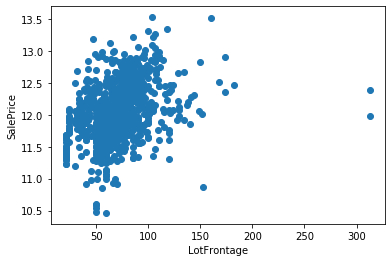

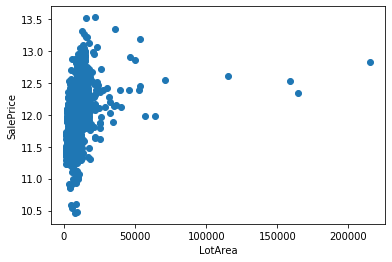

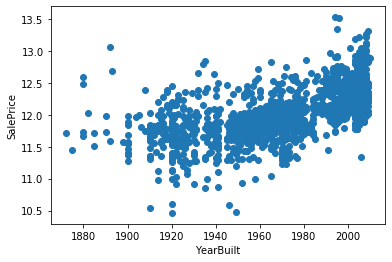

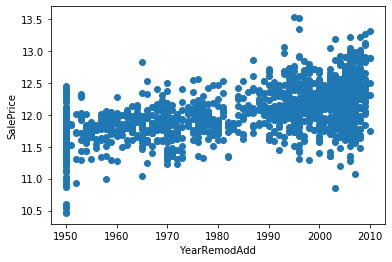

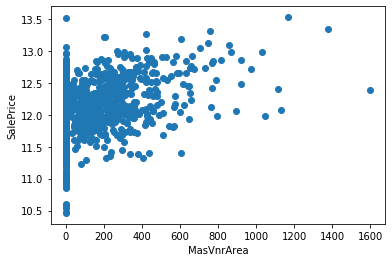

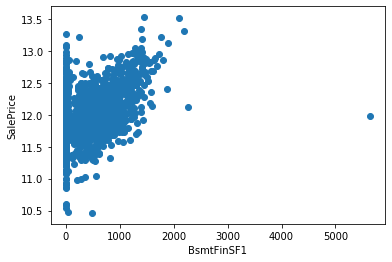

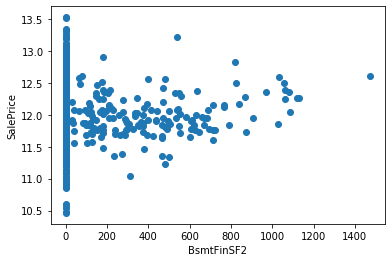

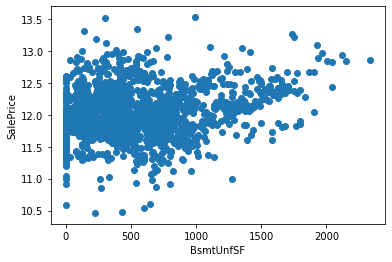

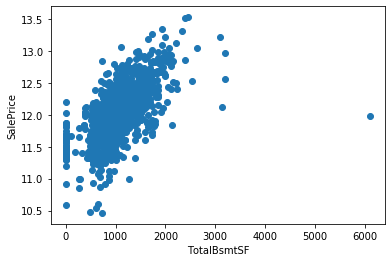

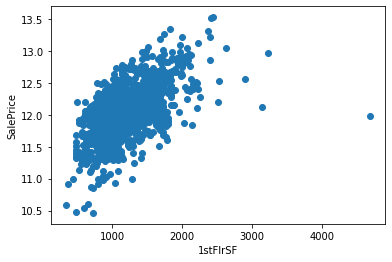

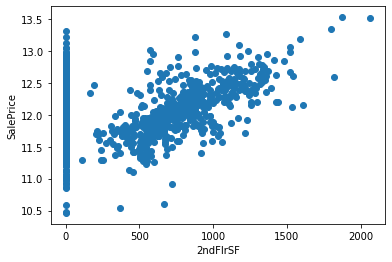

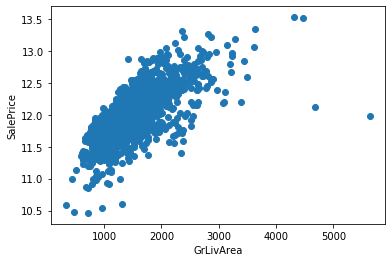

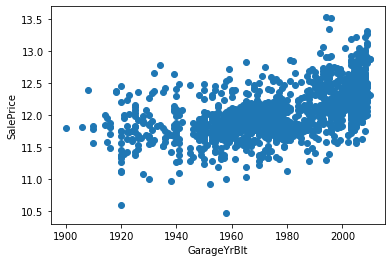

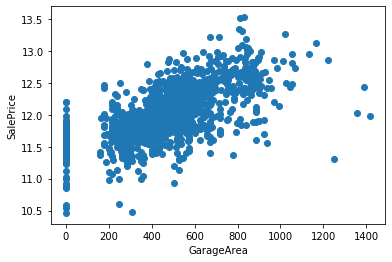

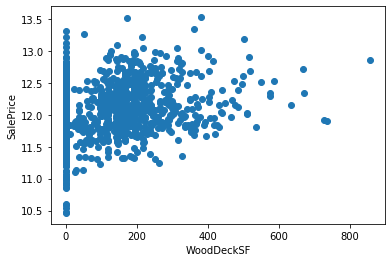

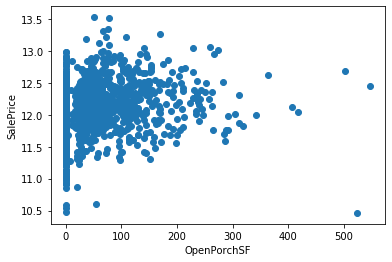

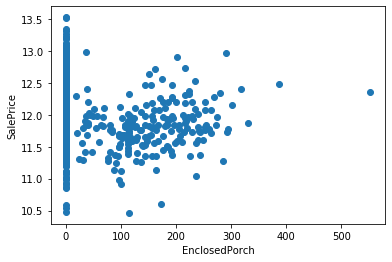

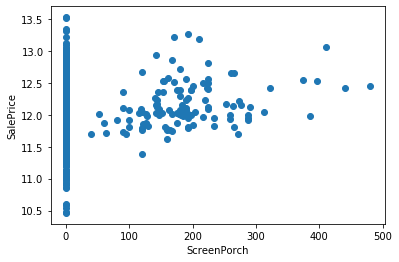

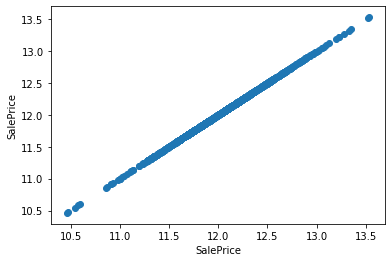

In [199]:
for feature in continous:
        plt.scatter(df_train[feature],df_train["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

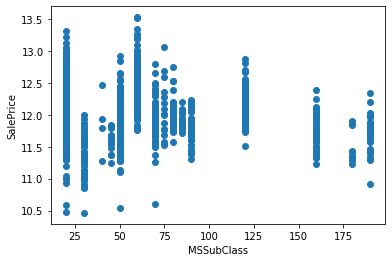

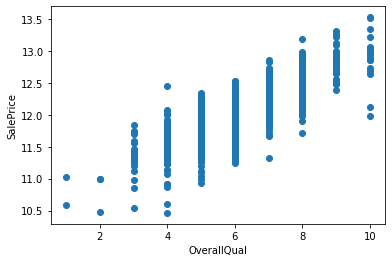

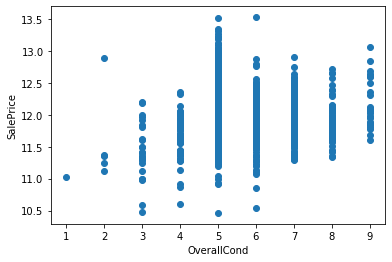

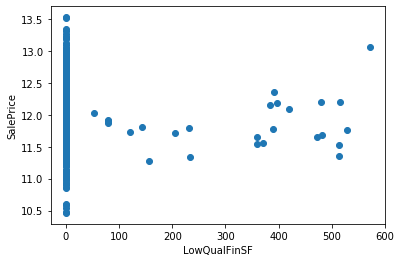

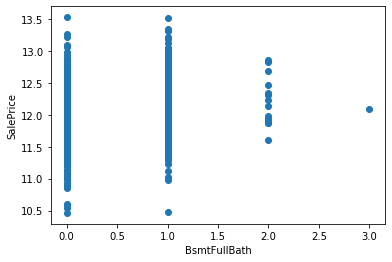

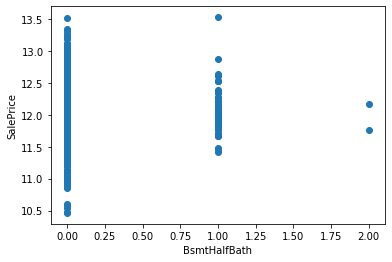

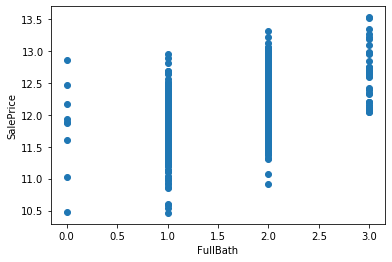

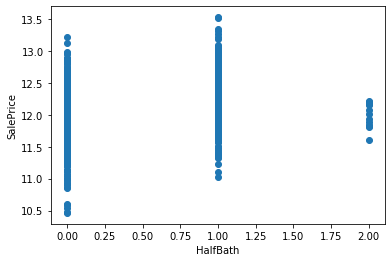

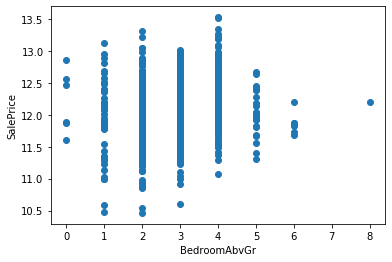

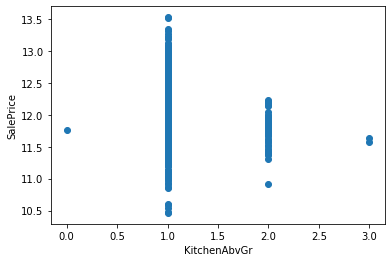

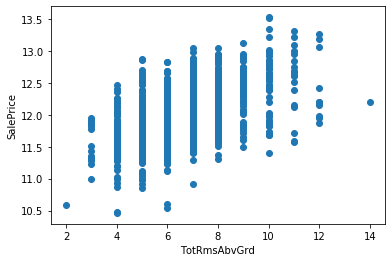

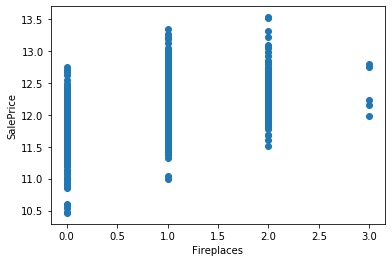

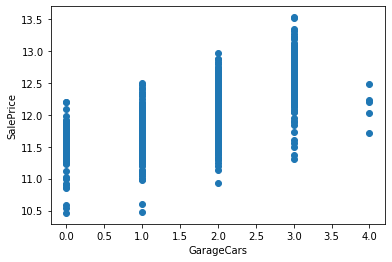

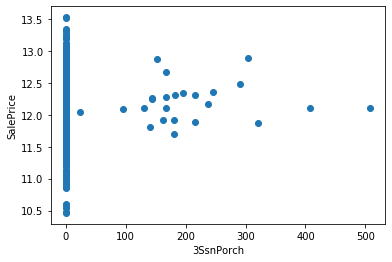

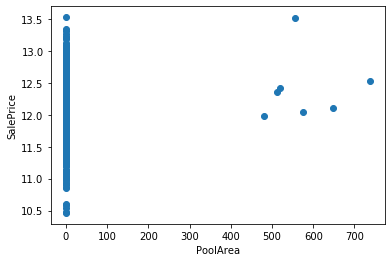

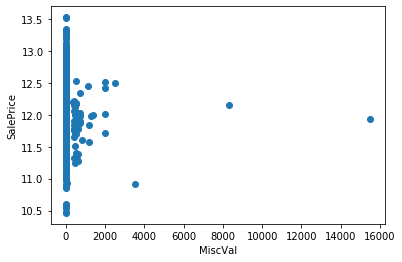

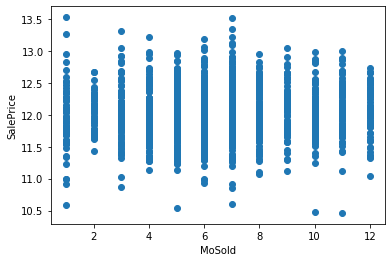

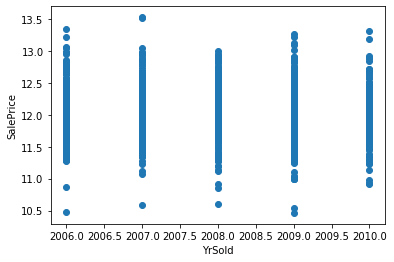

In [200]:
for feature in descrete:
        plt.scatter(df_train[feature],df_train["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# plotting the categorical data

In [201]:
categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

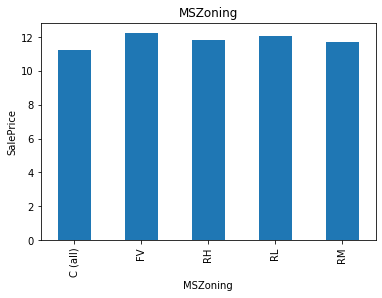

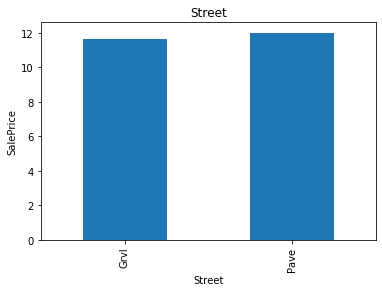

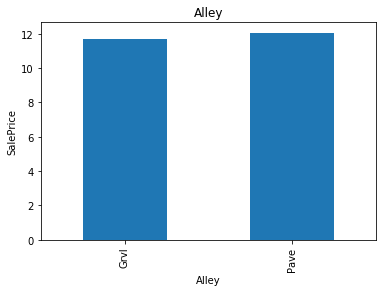

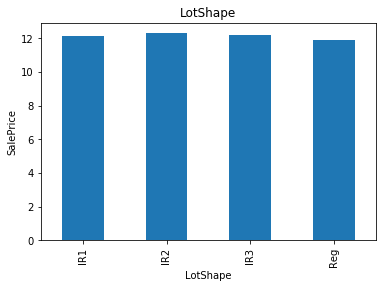

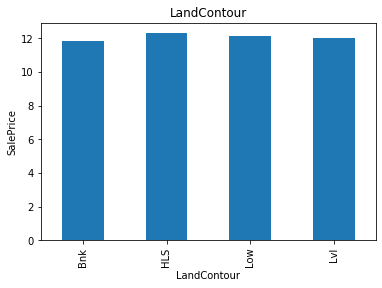

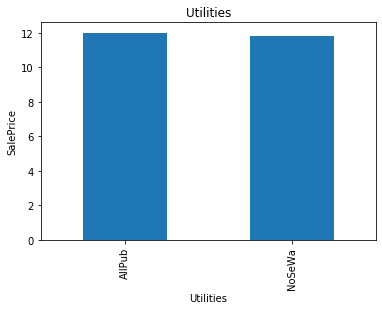

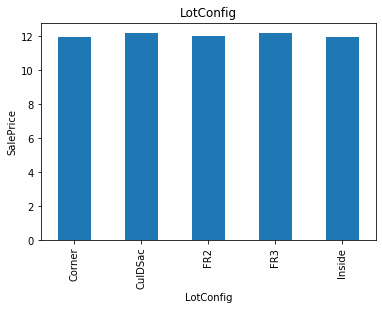

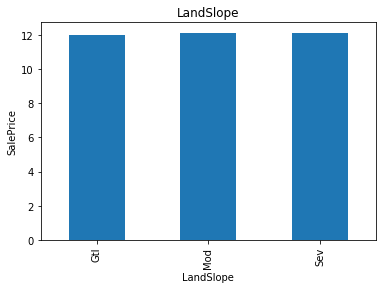

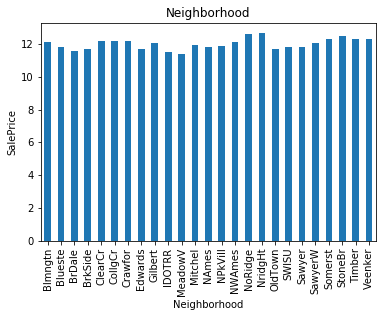

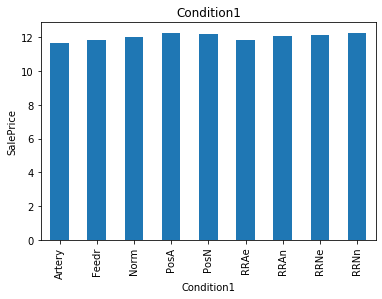

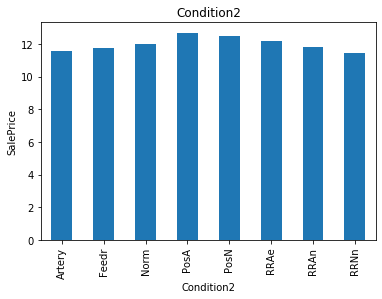

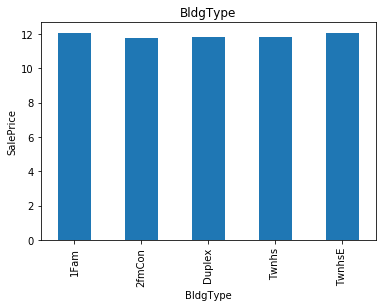

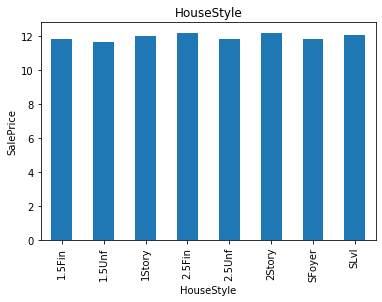

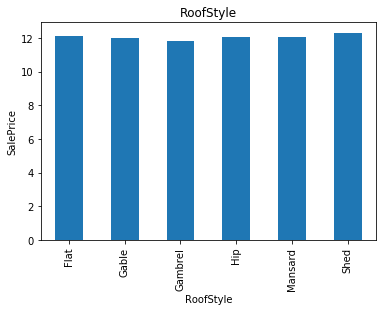

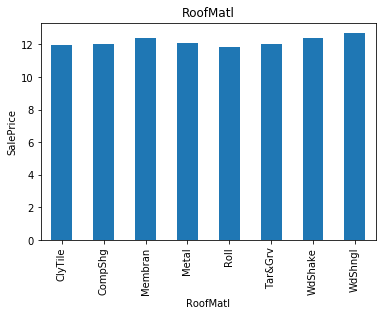

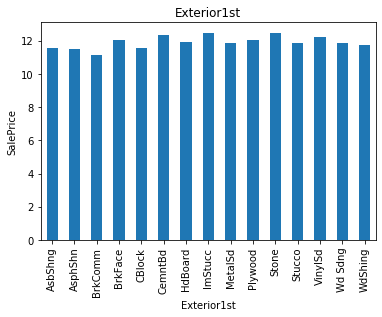

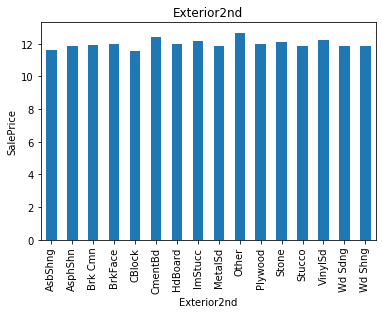

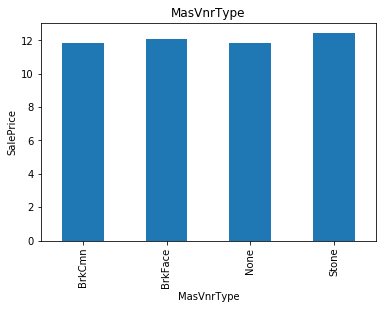

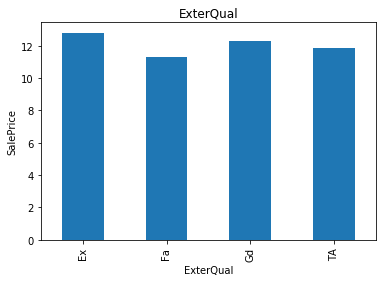

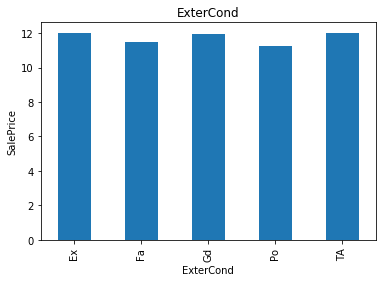

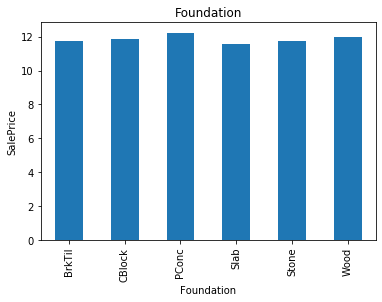

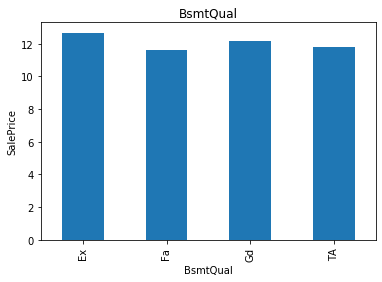

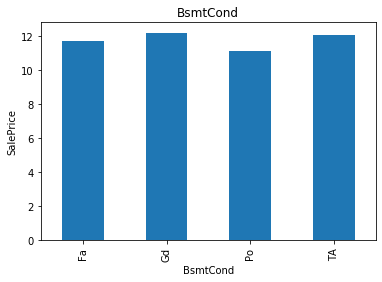

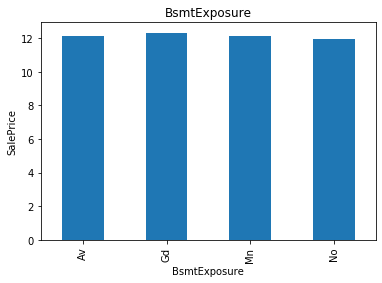

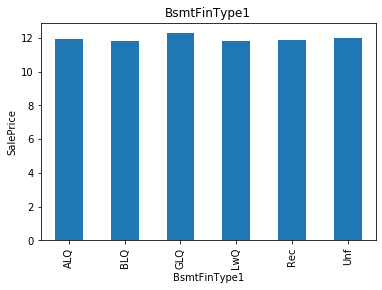

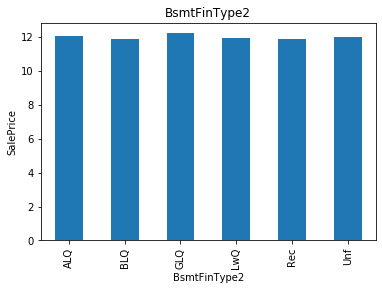

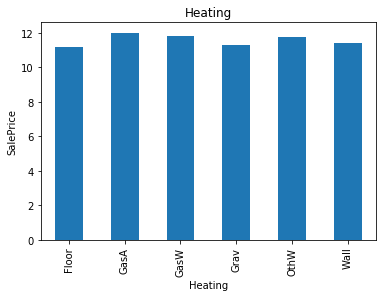

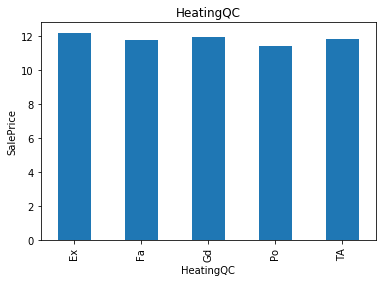

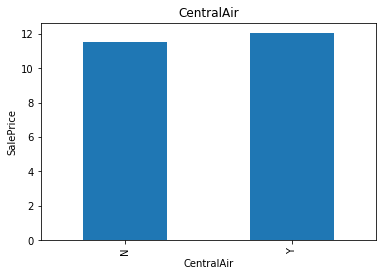

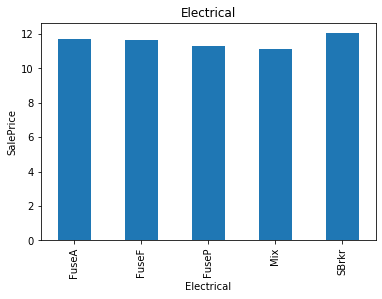

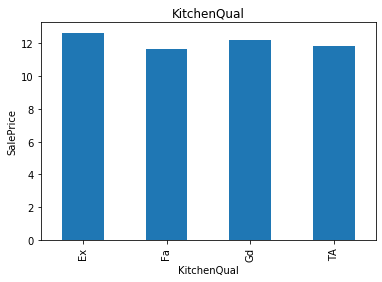

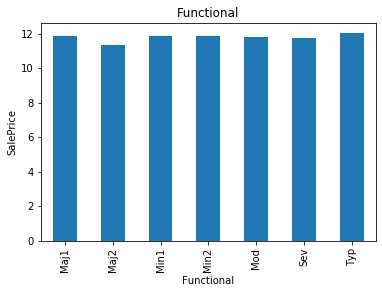

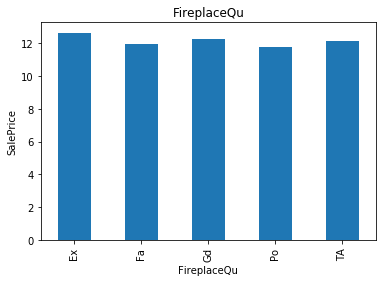

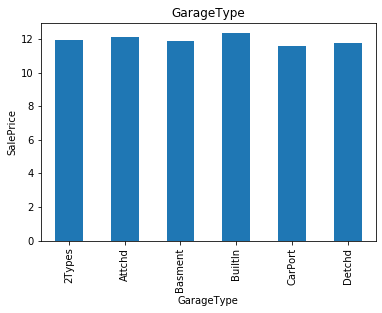

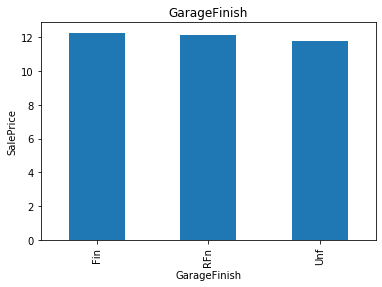

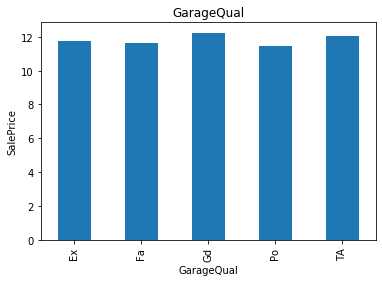

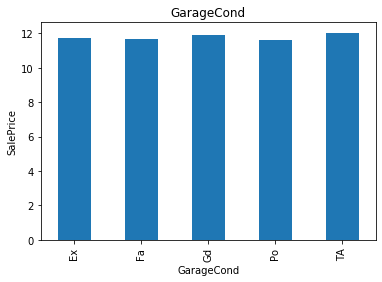

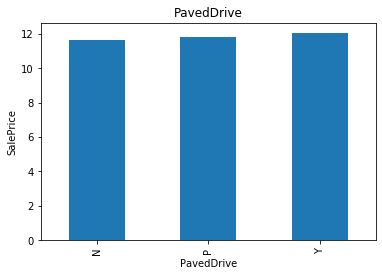

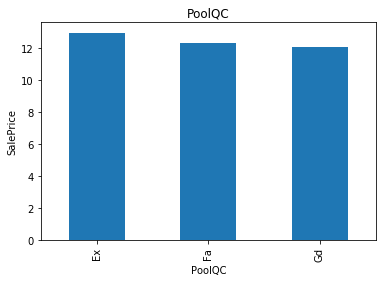

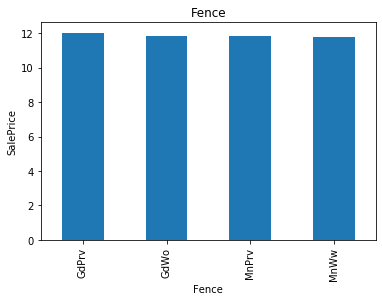

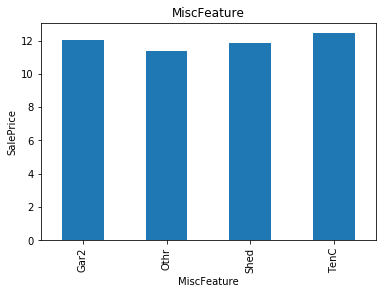

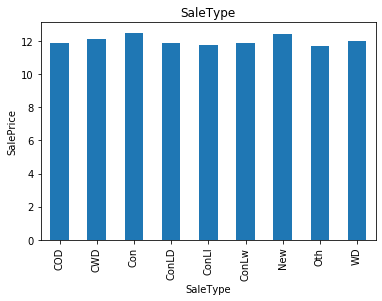

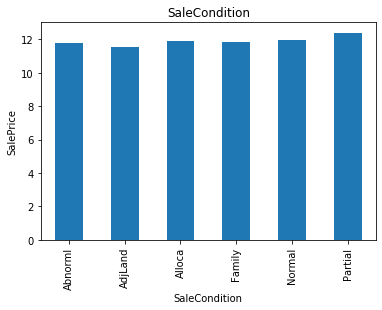

In [202]:
for feature in categorical:
    
    df_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [203]:
for feature in categorical:
    print(df_train[feature].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [204]:
#removing the outliers
df_train = df_train.drop(df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index)
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>6000) & (df_train['SalePrice']<300000)].index)
df_train.shape

(1455, 80)

# Correlation Matrix to reduce the number of features

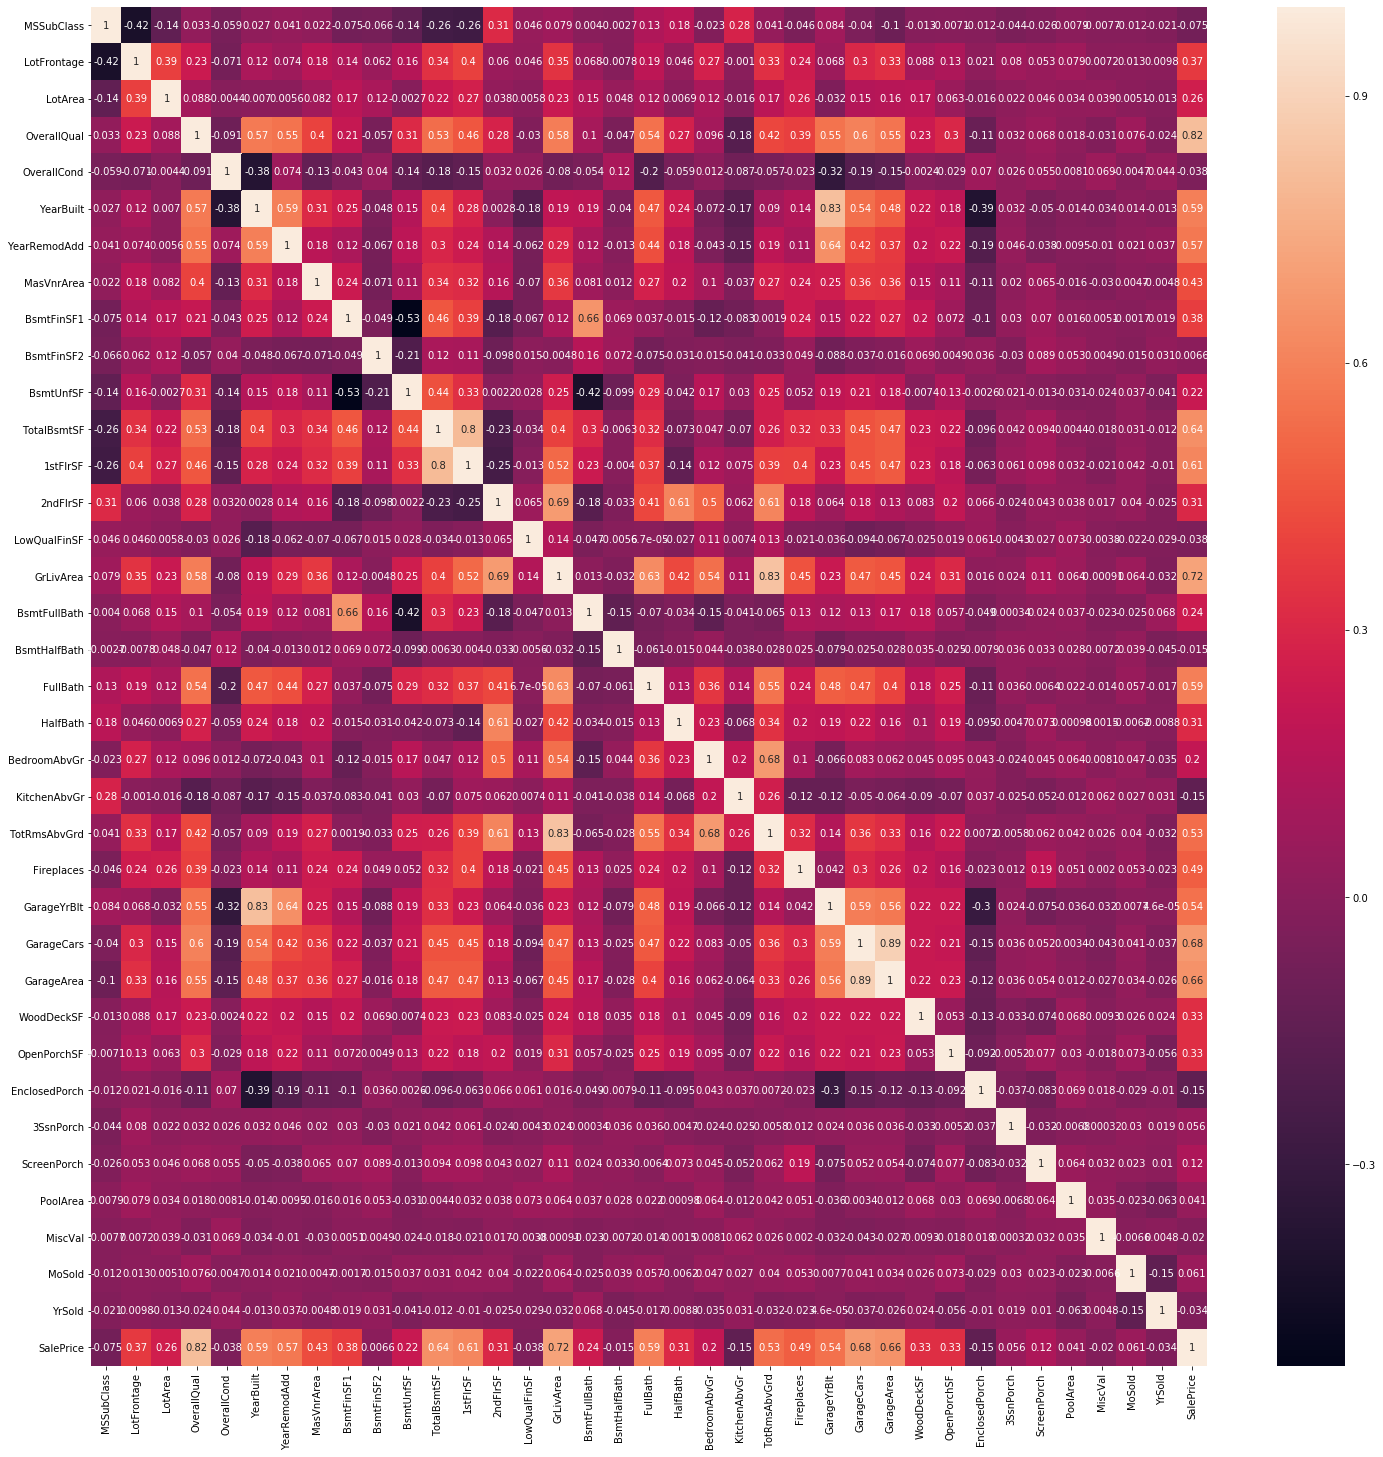

In [205]:
corrmat=df_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(25,25))
sns.heatmap(df_train[top_corr_features].corr(),annot=True)

In [206]:
corr = df_train.corr()
corr_abs = corr.abs()
min_val_corr=0.2
nr_num_cols = len(df_train)
ser_corr = corr_abs.nlargest(nr_num_cols, "SalePrice")["SalePrice"]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

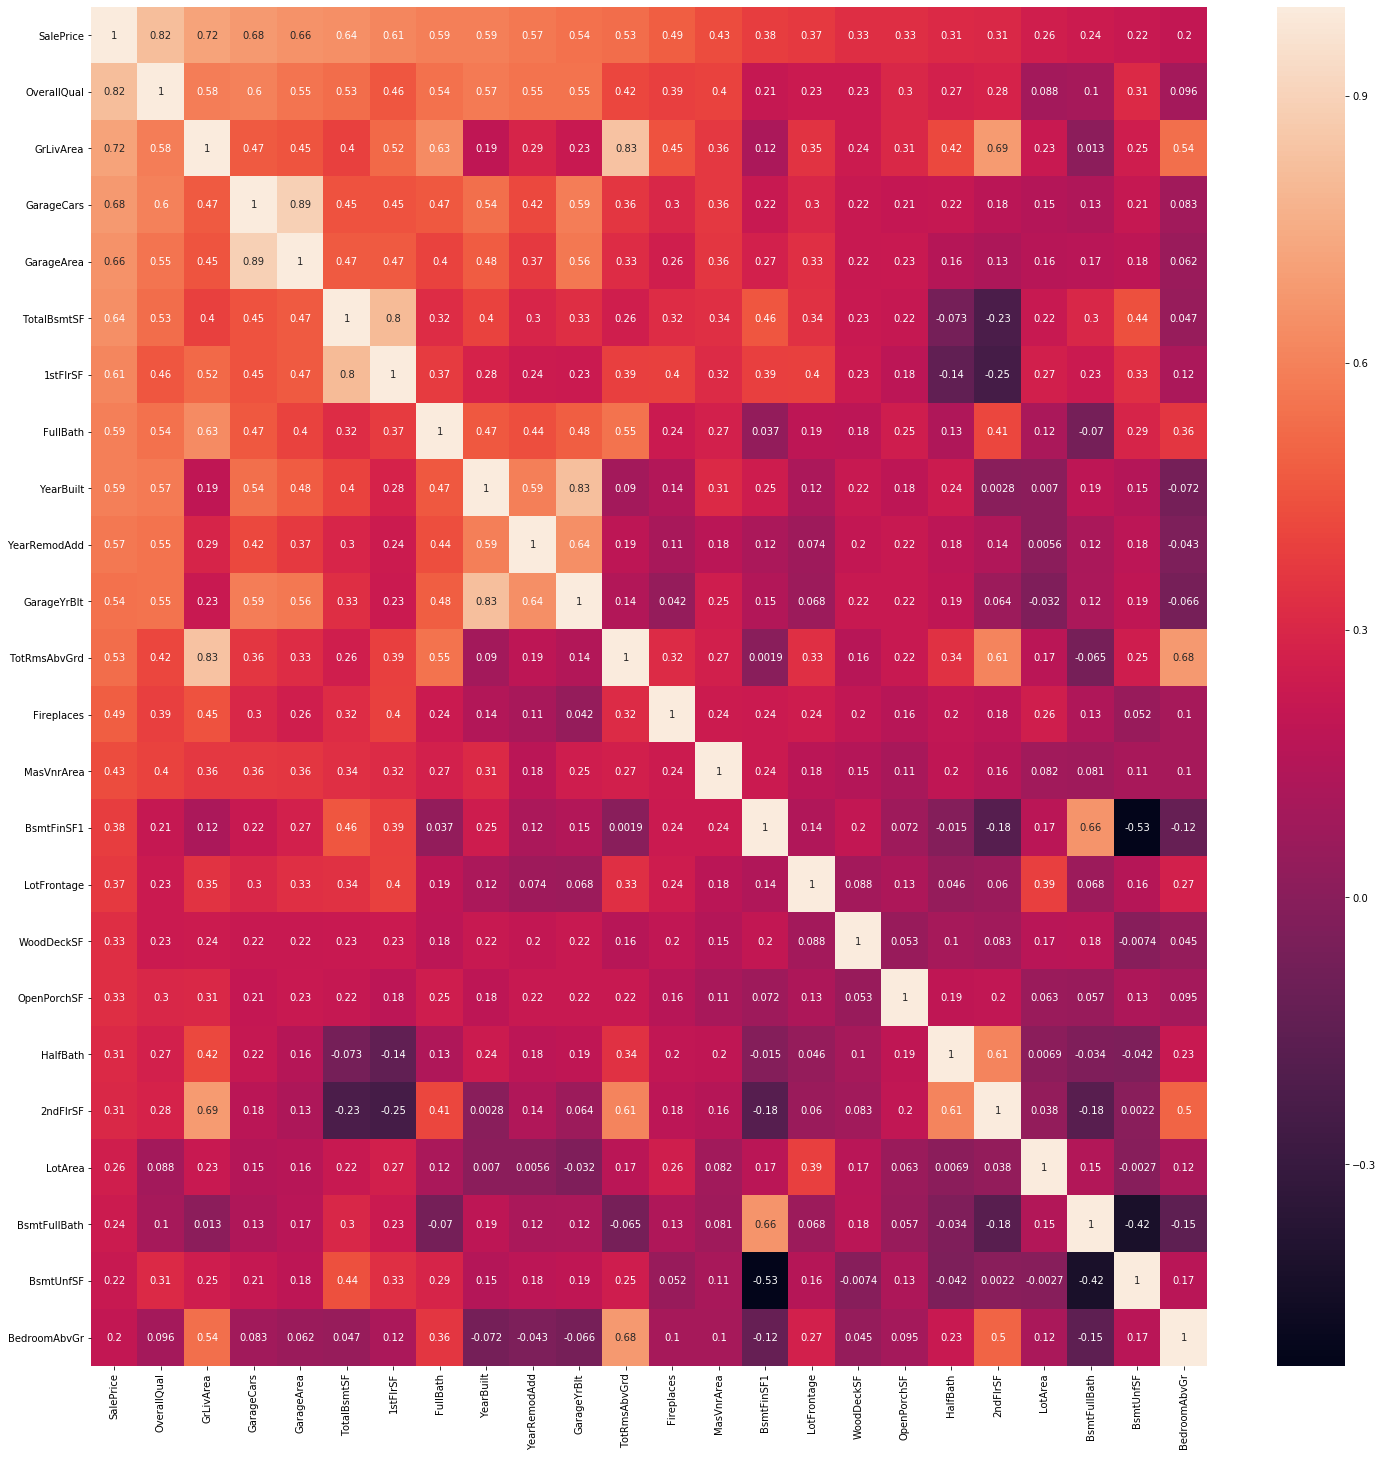

In [207]:
corrmat=df_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(25,25))
sns.heatmap(df_train[cols_abv_corr_limit].corr(),annot=True)

In [208]:
threshold=0.2
a=abs(corr["SalePrice"])
#result=a[a>threshold]
a

MSSubClass       0.074559
LotFrontage      0.373004
LotArea          0.258160
OverallQual      0.819184
OverallCond      0.037708
YearBuilt        0.589428
YearRemodAdd     0.568688
MasVnrArea       0.430635
BsmtFinSF1       0.382846
BsmtFinSF2       0.006610
BsmtUnfSF        0.223982
TotalBsmtSF      0.642768
1stFlrSF         0.613611
2ndFlrSF         0.307285
LowQualFinSF     0.037632
GrLivArea        0.718646
BsmtFullBath     0.238301
BsmtHalfBath     0.014823
FullBath         0.590710
HalfBath         0.311842
BedroomAbvGr     0.203409
KitchenAbvGr     0.147801
TotRmsAbvGrd     0.533042
Fireplaces       0.486941
GarageYrBlt      0.544777
GarageCars       0.680435
GarageArea       0.655316
WoodDeckSF       0.331227
OpenPorchSF      0.327656
EnclosedPorch    0.148455
3SsnPorch        0.056158
ScreenPorch      0.124078
PoolArea         0.040729
MiscVal          0.019701
MoSold           0.061186
YrSold           0.034419
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [209]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)


SalePrice        1.000000
OverallQual      0.819184
GrLivArea        0.718646
GarageCars       0.680435
GarageArea       0.655316
TotalBsmtSF      0.642768
1stFlrSF         0.613611
FullBath         0.590710
YearBuilt        0.589428
YearRemodAdd     0.568688
GarageYrBlt      0.544777
TotRmsAbvGrd     0.533042
Fireplaces       0.486941
MasVnrArea       0.430635
BsmtFinSF1       0.382846
LotFrontage      0.373004
WoodDeckSF       0.331227
OpenPorchSF      0.327656
HalfBath         0.311842
2ndFlrSF         0.307285
LotArea          0.258160
BsmtFullBath     0.238301
BsmtUnfSF        0.223982
BedroomAbvGr     0.203409
EnclosedPorch    0.148455
KitchenAbvGr     0.147801
ScreenPorch      0.124078
MSSubClass       0.074559
MoSold           0.061186
3SsnPorch        0.056158
PoolArea         0.040729
OverallCond      0.037708
LowQualFinSF     0.037632
YrSold           0.034419
MiscVal          0.019701
BsmtHalfBath     0.014823
BsmtFinSF2       0.006610
Name: SalePrice, dtype: float64
******

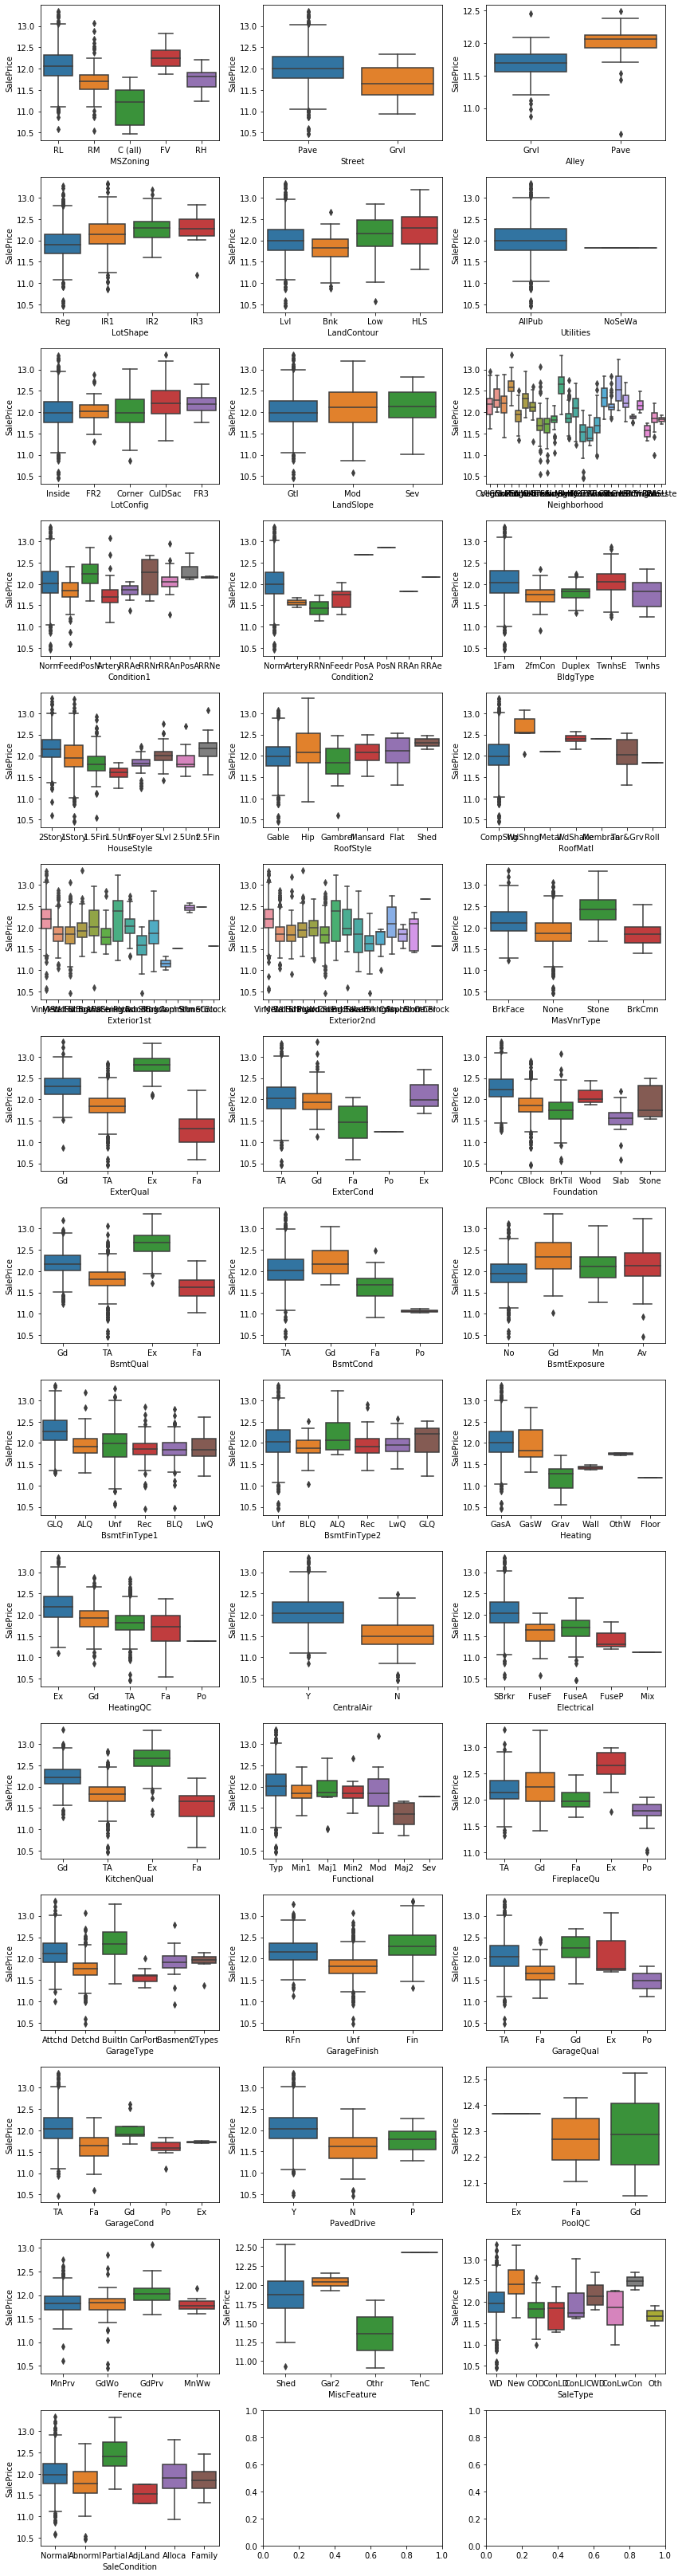

In [210]:
li_cat_feats = list(categorical)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y="SalePrice", data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

On what basis can we remove the categorical features ?

 We just look if the SalePrice (mean value and distribution) is significantly different for the different categories of each feature.
For example, look at the feature "MSZoning". The mean SalePrice for category "C(all)" is much lower than for the other categories. And the mean SalePrice for categories "RM" and "RH" is lower than for "RL" and "FV". So, there is a large probability that a House of category "C(all)" has lower SalePrice than one of category "FV".
In contrast, look at the feature "LandCountour", where the SalePrice for all categories is nearly the same.
For the Regression models, I only use those features that show a strong and clear relation to SalePrice in order to have a small number of features, keep the models simple and avoid overfitting.

here we didnt remove any categorical columns

# concat train and test

In [211]:

all_data=pd.concat([df_train,test])
all_data.shape

C:\Users\shkatta\python_anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2914, 80)

# Dropping the numerical columns with low corrleation value

In [212]:
all_data=all_data.drop(cols_bel_corr_limit,axis=1)

In [213]:
all_data.shape

(2914, 67)

## Multicollinearity

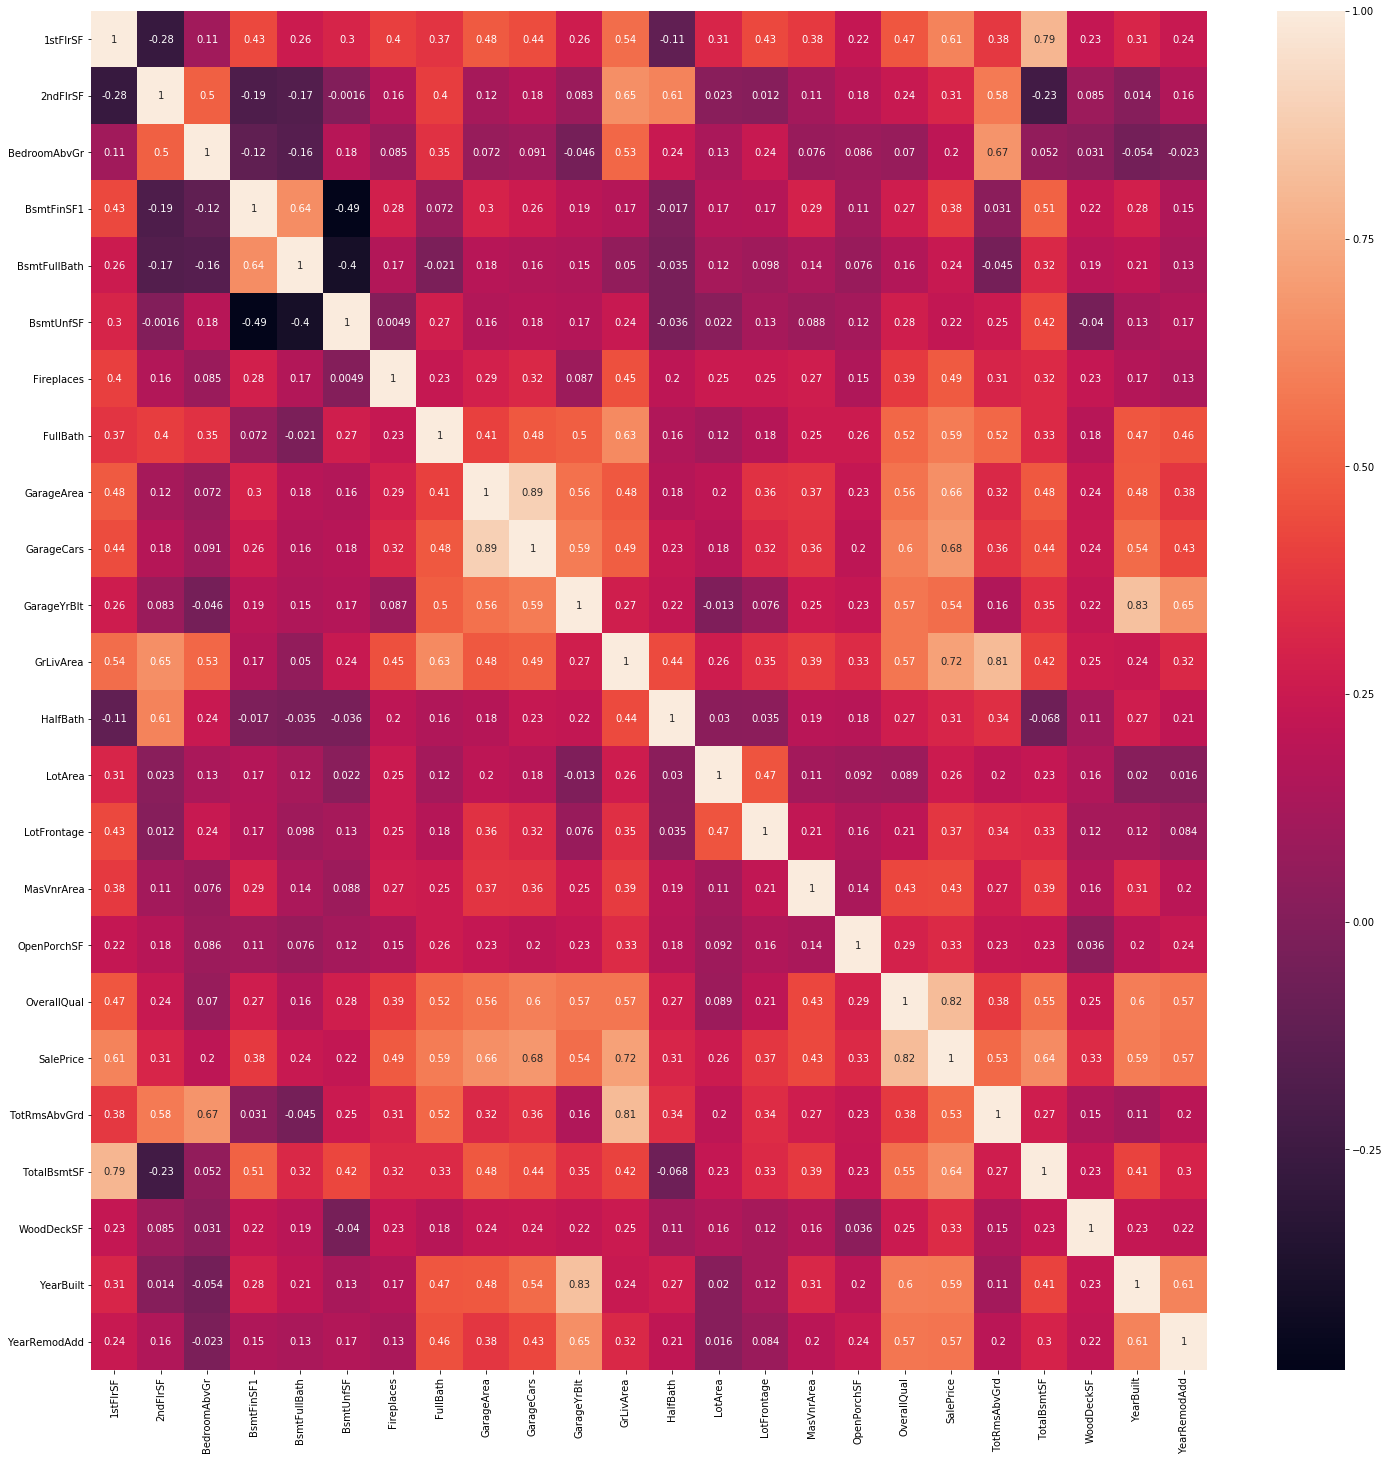

In [214]:
corrmat=all_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(25,25))
sns.heatmap(corrmat,annot=True)

from below we need to delete one of the feature 

In [220]:
import statsmodels.api as sm

In [215]:
data1=all_data[["YearBuilt","GarageYrBlt",]]
data1.corr()

YearBuilt  GarageYrBlt
YearBuilt     1.000000     0.834586
GarageYrBlt   0.834586     1.000000

In [218]:
data2=all_data[["TotRmsAbvGrd","GrLivArea",]]
data2.corr()

TotRmsAbvGrd  GrLivArea
TotRmsAbvGrd      1.000000   0.811734
GrLivArea         0.811734   1.000000

In [219]:
data3=all_data[["GarageArea","GarageCars",]]
data3.corr()

GarageArea  GarageCars
GarageArea    1.000000    0.891909
GarageCars    0.891909    1.000000

# Handling Missing Values

In [221]:
null=all_data.isnull().sum().sort_values(ascending=False)
percentage=(all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing=pd.concat([null,percentage],axis=1,keys=['Total',"Percentage"])
missing.head(35)

Total  Percentage
PoolQC         2906    0.997255
MiscFeature    2809    0.963967
Alley          2716    0.932052
Fence          2344    0.804393
SalePrice      1459    0.500686
FireplaceQu    1420    0.487303
LotFrontage     486    0.166781
GarageCond      159    0.054564
GarageFinish    159    0.054564
GarageQual      159    0.054564
GarageYrBlt     159    0.054564
GarageType      157    0.053878
BsmtExposure     82    0.028140
BsmtCond         82    0.028140
BsmtQual         81    0.027797
BsmtFinType2     80    0.027454
BsmtFinType1     79    0.027111
MasVnrType       24    0.008236
MasVnrArea       23    0.007893
MSZoning          4    0.001373
Functional        2    0.000686
Utilities         2    0.000686
BsmtFullBath      2    0.000686
Exterior1st       1    0.000343
GarageArea        1    0.000343
GarageCars        1    0.000343
TotalBsmtSF       1    0.000343
BsmtFinSF1        1    0.000343
Exterior2nd       1    0.000343
Electrical        1    0.000343
KitchenQual       1    0.000343
BsmtUnfSF         1    0.000343
SaleType          1    0.000343
ExterQual         0    0.000000
ExterCond         0    0.000000

we will handle the missing values one by one

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.


In [222]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [223]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [224]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence : data description says NA means "no fence"


In [225]:
all_data["Fence"] = all_data["Fence"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"


In [226]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

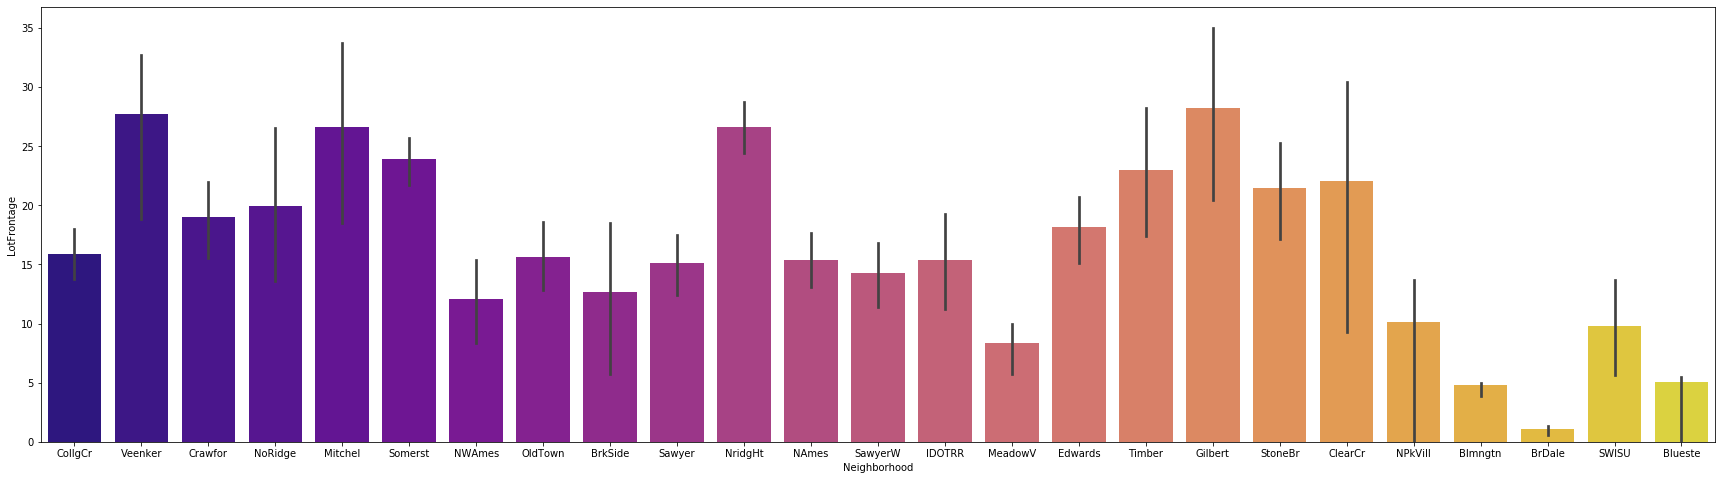

In [227]:
plt.figure(figsize=(30,8))
sns.barplot(x ='Neighborhood', y ='LotFrontage', data = all_data,  
            palette ='plasma', estimator = np.std) 

In [228]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [229]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [230]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [231]:
for col in ('BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [232]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [233]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [234]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

it also has no varience because mostly it contains only one category so does not help us in predicting the house price

In [235]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [236]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Functional : data description says NA means typical

In [237]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [238]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [239]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"


In [240]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [241]:
#all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [242]:
null=all_data.isnull().sum().sort_values(ascending=False)
percentage=(all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing=pd.concat([null,percentage],axis=1,keys=['Total',"Percentage"])
missing.head()

Total  Percentage
SalePrice      1459    0.500686
YearRemodAdd      0    0.000000
Fireplaces        0    0.000000
ExterCond         0    0.000000
ExterQual         0    0.000000

In [243]:
all_data.head()

1stFlrSF  2ndFlrSF Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  \
0       856       854  None             3     1Fam       TA           No   
1      1262         0  None             3     1Fam       TA           Gd   
2       920       866  None             3     1Fam       TA           Mn   
3       961       756  None             3     1Fam       Gd           No   
4      1145      1053  None             4     1Fam       TA           Av   

   BsmtFinSF1 BsmtFinType1 BsmtFinType2  BsmtFullBath BsmtQual  BsmtUnfSF  \
0       706.0          GLQ          Unf           1.0       Gd      150.0   
1       978.0          ALQ          Unf           0.0       Gd      284.0   
2       486.0          GLQ          Unf           1.0       Gd      434.0   
3       216.0          ALQ          Unf           1.0       TA      540.0   
4       655.0          GLQ          Unf           1.0       Gd      490.0   

  CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st  \
0          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
1          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd   
2          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
3          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng   
4          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   

  Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  \
0     VinylSd  None        None           0      PConc         2        Typ   
1     MetalSd  None          TA           1     CBlock         2        Typ   
2     VinylSd  None          TA           1      PConc         2        Typ   
3     Wd Shng  None          Gd           1     BrkTil         1        Typ   
4     VinylSd  None          TA           1      PConc         2        Typ   

   GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
0       548.0         2.0         TA          RFn         TA     Attchd   
1       460.0         2.0         TA          RFn         TA     Attchd   
2       608.0         2.0         TA          RFn         TA     Attchd   
3       642.0         3.0         TA          Unf         TA     Detchd   
4       836.0         3.0         TA          RFn         TA     Attchd   

   GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle KitchenQual  \
0       2003.0       1710         1    GasA        Ex     2Story          Gd   
1       1976.0       1262         0    GasA        Ex     1Story          TA   
2       2001.0       1786         1    GasA        Ex     2Story          Gd   
3       1998.0       1717         0    GasA        Gd     2Story          Gd   
4       2000.0       2198         1    GasA        Ex     2Story          Gd   

  LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape MSZoning  \
0         Lvl       Gtl     8450    Inside         65.0      Reg       RL   
1         Lvl       Gtl     9600       FR2         80.0      Reg       RL   
2         Lvl       Gtl    11250    Inside         68.0      IR1       RL   
3         Lvl       Gtl     9550    Corner         60.0      IR1       RL   
4         Lvl       Gtl    14260       FR2         84.0      IR1       RL   

   MasVnrArea MasVnrType MiscFeature Neighborhood  OpenPorchSF  OverallQual  \
0       196.0    BrkFace        None      CollgCr           61            7   
1         0.0       None        None      Veenker            0            6   
2       162.0    BrkFace        None      CollgCr           42            7   
3         0.0       None        None      Crawfor           35            7   
4       350.0    BrkFace        None      NoRidge           84            8   

  PavedDrive PoolQC RoofMatl RoofStyle SaleCondition  SalePrice SaleType  \
0          Y   None  CompShg     Gable        Normal  12.247699       WD   
1          Y   None  CompShg     Gable        Normal  12.109016       WD   
2          Y   None  Co

In [244]:
#all_data["OverallCond"].value_counts()

Transforming some numerical variables that are really categorical

In [245]:
#MSSubClass=The building class
#all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [246]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [247]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2914, 67)


In [248]:
numerical=all_data.dtypes[all_data.dtypes != "object"].index


In [249]:
# Find skewed numerical features
skew_features = all_data[numerical].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(18)


There are 17 numerical features with Skew > 0.5 :


LotArea         13.154026
LandSlope        4.992643
MasVnrArea       2.600161
OpenPorchSF      2.528852
WoodDeckSF       1.847865
1stFlrSF         1.254280
GrLivArea        0.979034
BsmtFinSF1       0.973942
TotalSF          0.936175
BsmtUnfSF        0.919692
2ndFlrSF         0.842718
TotRmsAbvGrd     0.750665
Fireplaces       0.726543
HalfBath         0.698226
TotalBsmtSF      0.662263
BsmtFullBath     0.623772
LotFrontage      0.620401
HeatingQC        0.483850
dtype: float64

# Box Cox Transformation of (highly) skewed features

In [250]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 17 skewed numerical features to Box Cox transform


In [251]:
# Find skewed numerical features
skew_features = all_data[numerical].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(18)


There are 3 numerical features with Skew > 0.5 :


LandSlope       4.547408
MasVnrArea      0.636163
HalfBath        0.593979
HeatingQC       0.483850
BsmtFullBath    0.442977
FireplaceQu     0.337615
2ndFlrSF        0.329401
BedroomAbvGr    0.328910
Fireplaces      0.286325
WoodDeckSF      0.224952
GarageArea      0.217870
OverallQual     0.182487
LotArea         0.176648
1stFlrSF        0.173189
FullBath        0.160584
TotRmsAbvGrd    0.134857
GrLivArea       0.102996
OpenPorchSF     0.100036
dtype: float64

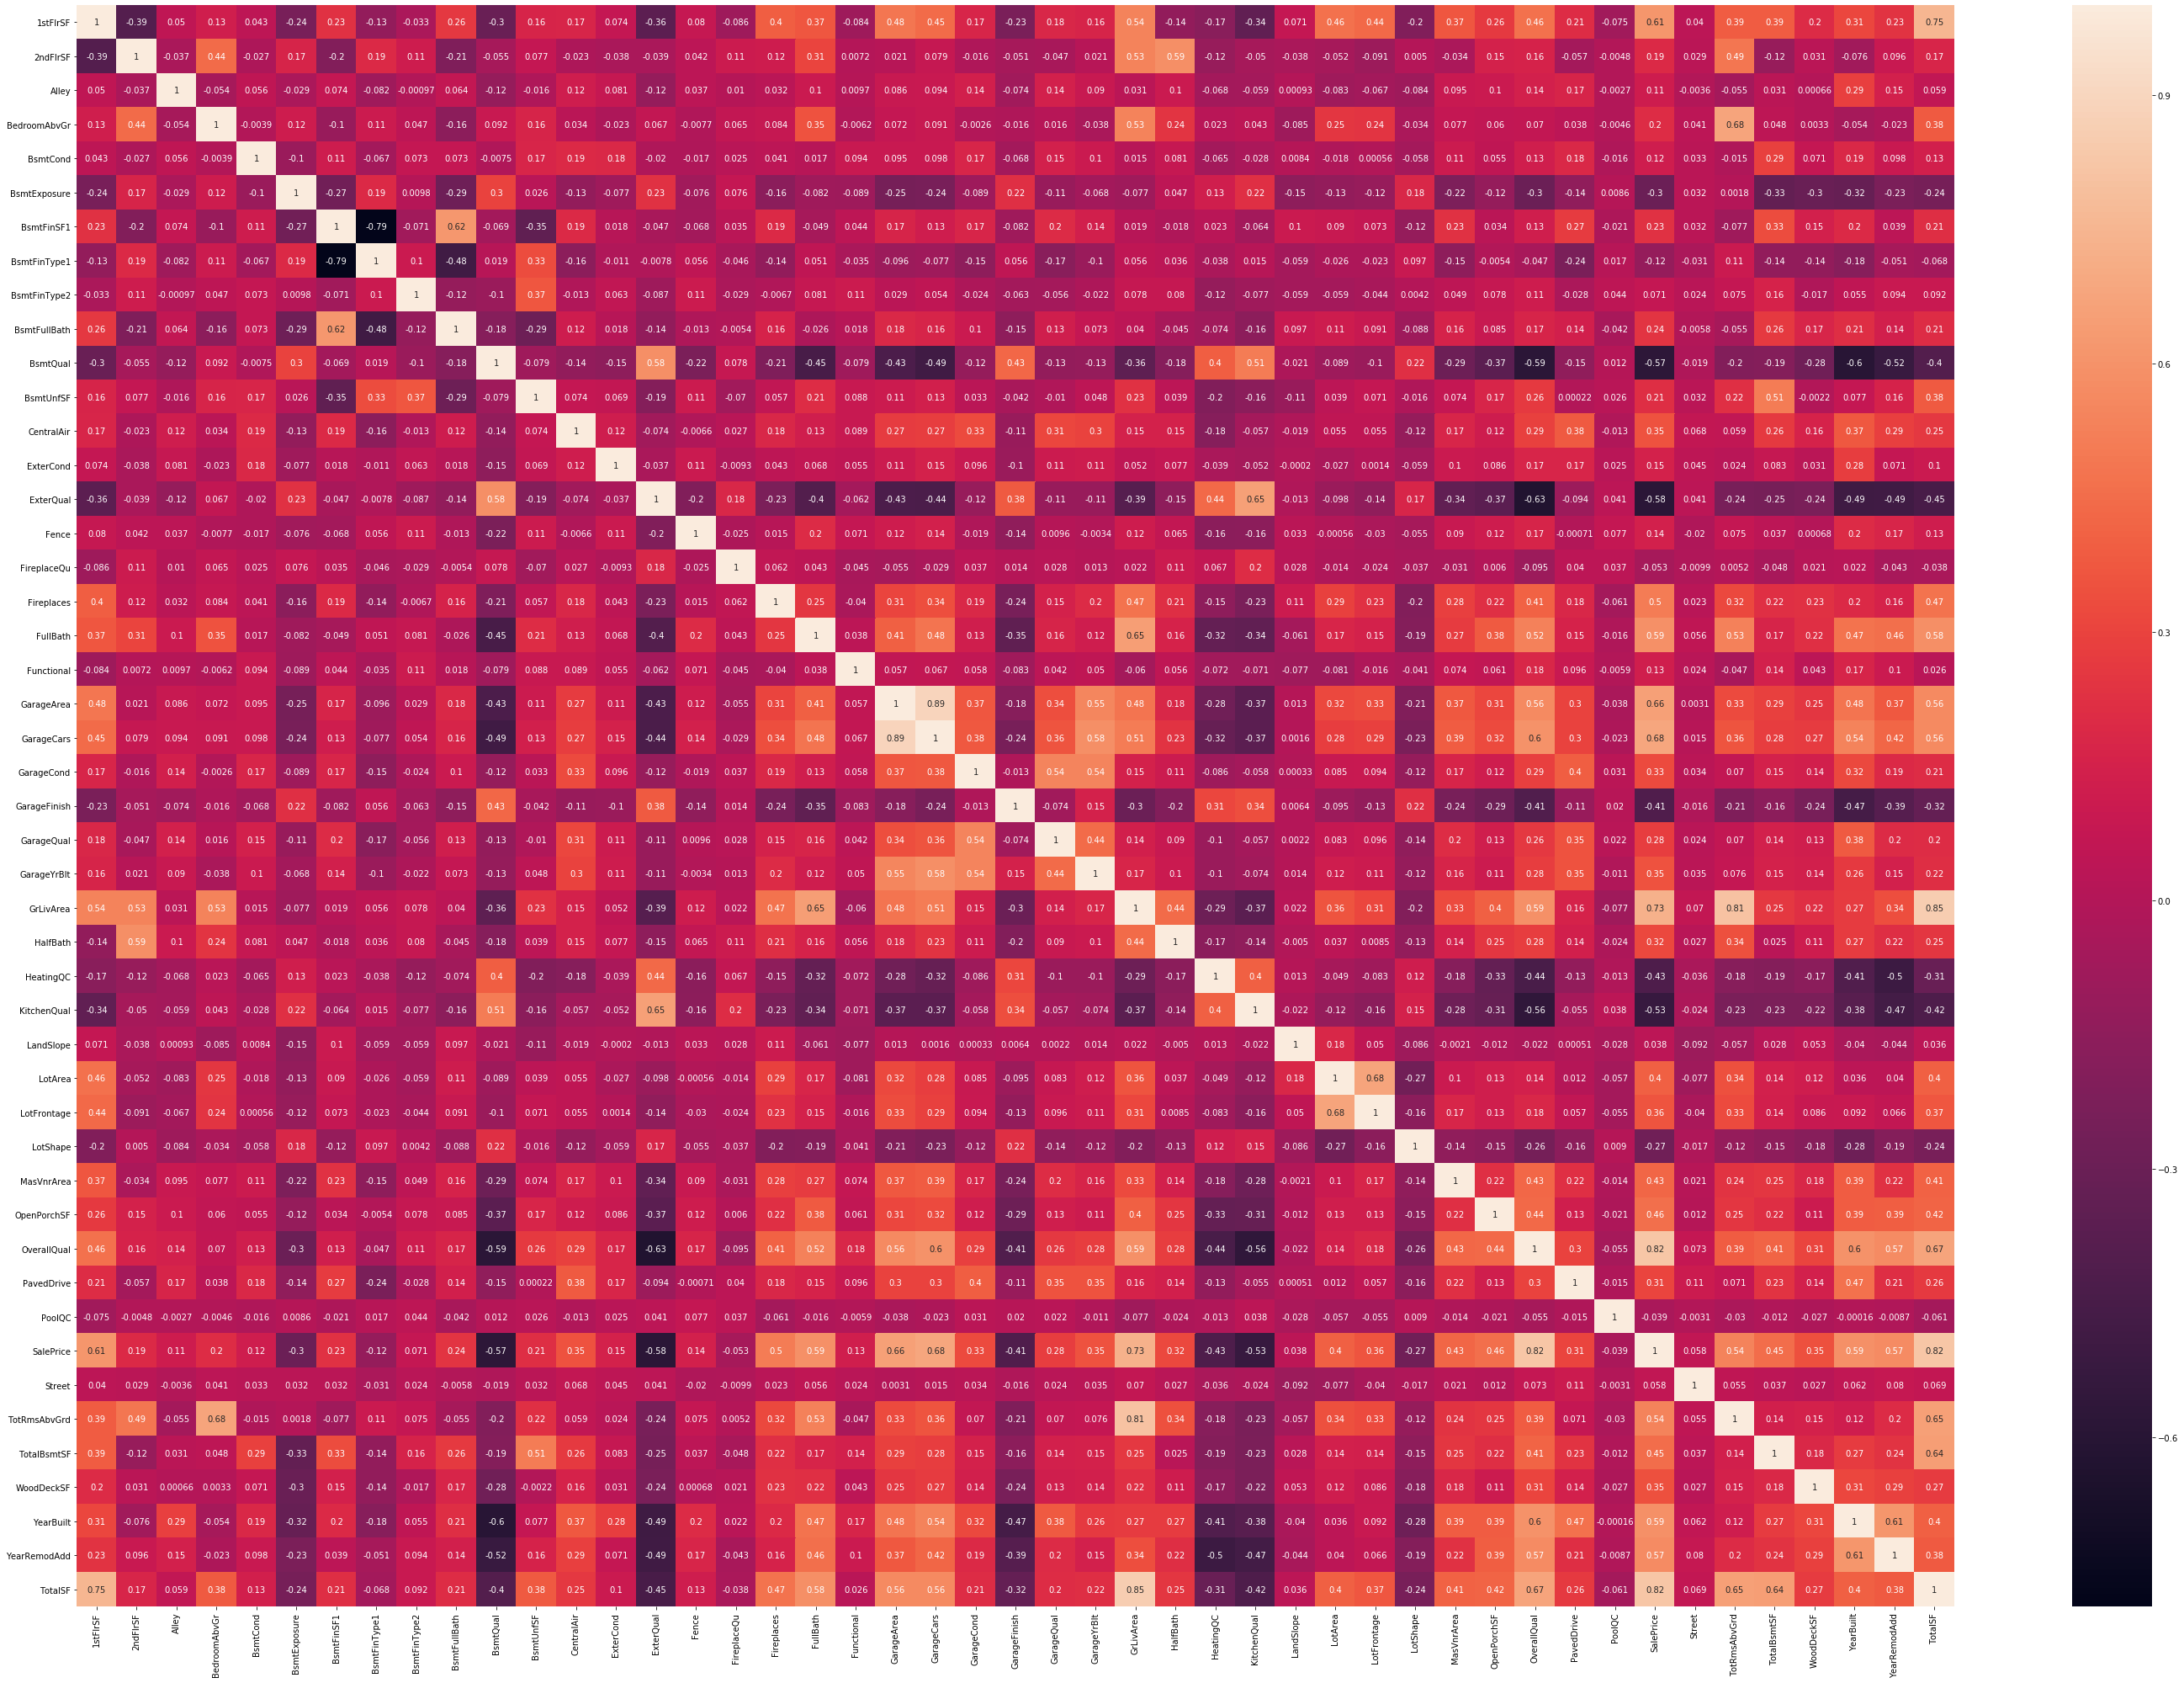

In [252]:
corrmat=all_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(50,35))
sns.heatmap(all_data[top_corr_features].corr(),annot=True)

# Feature removal based on lasso

this is just a sample to show we didnt remove them

In [256]:
## Capture the dependent feature
y_train=all_data[['SalePrice']][0:1455]
y_train.shape

(1455, 1)

In [262]:
#X_train=all_data.drop(['Id','SalePrice'],axis=1)
X_train=all_data[0:1455]
X_train=pd.get_dummies(X_train)
X_train.shape

(1455, 208)

In [263]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [264]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [265]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [266]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 208
selected features: 14
features with coefficients shrank to zero: 193


In [150]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2914, 208)


In [151]:
train = all_data[:1455]
test = all_data[1455:]

In [152]:
test.shape

(1459, 208)

In [153]:
test=test.drop(["SalePrice"],axis=1)
test.shape

(1459, 207)

In [154]:
x=train.drop(["SalePrice"],axis=1)
y=train["SalePrice"]
print(x.shape)
print(y.shape)

(1455, 207)
(1455,)


In [155]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [156]:
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
kf

5

In [157]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

# LASSO Regression :

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [158]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

# Elastic Net Regression :

In [159]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# Kernel Ridge Regression :

In [160]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [161]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

# XGBoost :

In [162]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# LightGBM :

In [163]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# Base models scores

In [164]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1160 (0.0070)



In [165]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1160 (0.0071)



In [166]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2359 (0.0504)



In [167]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1235 (0.0086)



In [168]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1204 (0.0061)



In [169]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


LGBM score: 0.1218 (0.0050)



In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
reg = make_pipeline(RobustScaler(), RandomForestRegressor())

In [172]:
score = rmsle_cv(reg)
print("randomforest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


randomforest score: 0.1491 (0.0031)



C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [173]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [174]:
model_xgb.fit(x, y)
xgb_train_pred = model_xgb.predict(x)
xgb_pred = np.expm1(model_xgb.predict(test))
#print(rmsle(y_train, xgb_train_pred))

In [175]:
model_lgb.fit(x, y)
lgb_train_pred = model_lgb.predict(x)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y, lgb_train_pred))

0.07762189943162431


In [176]:
print(rmsle(y, xgb_train_pred))

0.08184375522986619


In [178]:
x=pd.DataFrame(xgb_pred)
sub=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\sample_submission.csv")
x=pd.concat([sub["Id"],x],axis=1)
x.columns=["Id","SalePrice"]
x.to_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\edited8.csv",index=False)

In [177]:
x=pd.DataFrame(lgb_pred)
sub=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\sample_submission.csv")
x=pd.concat([sub["Id"],x],axis=1)
x.columns=["Id","SalePrice"]
x.to_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\edited9.csv",index=False)

In [35]:
for feature in categorical:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    print(temp)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

BldgType
1Fam      0.830764
2fmCon    0.021240
Duplex    0.037342
Twnhs     0.032888
TwnhsE    0.077766
Name: SalePrice, dtype: float64
BsmtCond
Fa    0.035629
Gd    0.041795
Po    0.001713
TA    0.892771
Name: SalePrice, dtype: float64
BsmtExposure
Av    0.143200
Gd    0.094553
Mn    0.081877
No    0.652278
Name: SalePrice, dtype: float64
BsmtFinType1
ALQ    0.146968
BLQ    0.092155
GLQ    0.290853
LwQ    0.052758
Rec    0.098664
Unf    0.291538
Name: SalePrice, dtype: float64
BsmtFinType2
ALQ    0.017814
BLQ    0.023296
GLQ    0.011648
LwQ    0.029805
Rec    0.035971
Unf    0.854060
Name: SalePrice, dtype: float64
BsmtQual
Ex    0.088386
Fa    0.030147
Gd    0.414183
TA    0.439534
Name: SalePrice, dtype: float64
CentralAir
N    0.067146
Y    0.932854
Name: SalePrice, dtype: float64
Condition1
Artery    0.031518
Feedr     0.056184
Norm      0.860226
PosA      0.006852
PosN      0.013361
RRAe      0.009592
RRAn      0.017129
RRNe      0.002055
RRNn      0.003083
Name: SalePrice, dtype

In [36]:
dataset[categorical.columns].head()

BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0     1Fam       TA           No          GLQ          Unf       Gd   
1     1Fam       TA           Gd          ALQ          Unf       Gd   
2     1Fam       TA           Mn          GLQ          Unf       Gd   
3     1Fam       Gd           No          ALQ          Unf       TA   
4     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st  \
0          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
1          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd   
2          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
3          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng   
4          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   

  Exterior2nd Foundation Functional GarageCond GarageFinish GarageQual  \
0     VinylSd      PConc        Typ         TA          RFn         TA   
1     MetalSd     CBlock        Typ         TA          RFn         TA   
2     VinylSd      PConc        Typ         TA          RFn         TA   
3     Wd Shng     BrkTil        Typ         TA          Unf         TA   
4     VinylSd      PConc        Typ         TA          RFn         TA   

  GarageType Heating HeatingQC HouseStyle KitchenQual LandContour LandSlope  \
0     Attchd    GasA        Ex     2Story          Gd         Lvl       Gtl   
1     Attchd    GasA        Ex     1Story          TA         Lvl       Gtl   
2     Attchd    GasA        Ex     2Story          Gd         Lvl       Gtl   
3     Detchd    GasA        Gd     2Story          Gd         Lvl       Gtl   
4     Attchd    GasA        Ex     2Story          Gd         Lvl       Gtl   

  LotConfig LotShape MSZoning MasVnrType Neighborhood PavedDrive RoofMatl  \
0    Inside      Reg       RL    BrkFace      CollgCr          Y  CompShg   
1       FR2      Reg       RL       None     Rare_var          Y  CompShg   
2    Inside      IR1       RL    BrkFace      CollgCr          Y  CompShg   
3    Corner      IR1       RL       None      Crawfor          Y  CompShg   
4       FR2      IR1       RL    BrkFace      NoRidge          Y  CompShg   

  RoofStyle SaleCondition SaleType Street Utilities  
0     Gable        Normal       WD   Pave    AllPub  
1     Gable        Normal       WD   Pave    AllPub  
2     Gable        Normal       WD   Pave    AllPub  
3     Gable       Abnorml       WD   Pave    AllPub  
4     Gable        Normal       WD   Pave    AllPub

In [37]:

for column in categorical:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    categorical[column].fillna(categorical[column].mode()[0], inplace=True)
    #dataset[column].fillna("NA", inplace=True)




In [38]:
categorical.isnull().sum().sort_values(ascending=False)

Utilities        0
Electrical       0
GarageCond       0
Functional       0
Foundation       0
Exterior2nd      0
Exterior1st      0
ExterQual        0
ExterCond        0
Condition2       0
Street           0
Condition1       0
CentralAir       0
BsmtQual         0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
SaleType         0
SaleCondition    0
RoofStyle        0
RoofMatl         0
PavedDrive       0
Neighborhood     0
MasVnrType       0
MSZoning         0
LotShape         0
LotConfig        0
LandSlope        0
LandContour      0
KitchenQual      0
HouseStyle       0
HeatingQC        0
BldgType         0
dtype: int64

In [39]:
dataset.isnull().sum().sort_values(ascending=False)

YrSold         0
Functional     0
ExterCond      0
ExterQual      0
Exterior1st    0
              ..
MSZoning       0
MasVnrArea     0
MasVnrType     0
MiscVal        0
1stFlrSF       0
Length: 76, dtype: int64

In [40]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [41]:
data=dataset[0:1460]
data=data.drop(["SalePrice"],axis=1)

In [42]:
data.corr()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
1stFlrSF       1.000000 -0.349622   0.058601      0.150276    0.198734   
2ndFlrSF      -0.349622  1.000000  -0.023914      0.438227   -0.205426   
3SsnPorch      0.058601 -0.023914   1.000000     -0.025748    0.051775   
BedroomAbvGr   0.150276  0.438227  -0.025748      1.000000   -0.094666   
BsmtFinSF1     0.198734 -0.205426   0.051775     -0.094666    1.000000   
BsmtFinSF2     0.070848 -0.112673  -0.022537      0.007036    0.185051   
BsmtFullBath   0.245000 -0.212948   0.008412     -0.150673    0.591148   
BsmtHalfBath   0.012373 -0.025487   0.055932      0.046519    0.107098   
BsmtUnfSF      0.150662  0.091389   0.004390      0.146395   -0.265488   
EnclosedPorch -0.113931  0.077434  -0.038943      0.010174   -0.127733   
Fireplaces     0.403705  0.132425   0.024391      0.107570    0.146194   
FullBath       0.368164  0.320788   0.033416      0.363252   -0.085258   
GarageArea     0.286678  0.039580   0.036447      0.014818    0.123409   
GarageCars     0.448210  0.075337   0.033975      0.086106    0.070302   
GarageYrBlt   -0.188440 -0.042358  -0.032230      0.009810   -0.105367   
GrLivArea      0.545990  0.558571   0.033182      0.538848   -0.014440   
HalfBath      -0.137608  0.589430  -0.000969      0.226651   -0.005373   
Id             0.009417  0.012489  -0.039543      0.037719   -0.012806   
KitchenAbvGr   0.071356  0.045680  -0.027176      0.198597   -0.134813   
LotArea        0.467442 -0.012775   0.055375      0.279173    0.096966   
LotFrontage    0.035447 -0.008567   0.026391      0.011289    0.110970   
LowQualFinSF  -0.042014  0.048437   0.016699      0.074101   -0.063563   
MSSubClass    -0.288573  0.362362  -0.036444     -0.023438   -0.042270   
MasVnrArea     0.327280 -0.014596   0.047540      0.090383    0.185368   
MiscVal       -0.042057  0.000208   0.007221      0.014331    0.018808   
MoSold         0.048757  0.026779   0.039018      0.046544   -0.027153   
OpenPorchSF    0.244062  0.168125   0.020346      0.083785    0.015075   
OverallCond   -0.136791  0.055934   0.038835      0.012980    0.045200   
OverallQual    0.456066  0.198064   0.027546      0.101676    0.054199   
PoolArea       0.092998  0.042449  -0.008828      0.070703    0.035288   
ScreenPorch    0.102452  0.008656  -0.037627      0.024684    0.073392   
TotRmsAbvGrd   0.404150  0.509116  -0.007060      0.676620   -0.091730   
TotalBsmtSF    0.288227 -0.058313   0.002765      0.027387    0.290132   
WoodDeckSF     0.200377  0.039713  -0.023906      0.017418    0.082144   
YearBuilt     -0.277909  0.076389  -0.028498      0.068960   -0.149493   
YearRemodAdd  -0.235029 -0.074880  -0.051774      0.038273   -0.009939   
YrSold        -0.019273 -0.015060   0.009883     -0.036014    0.033702   

               BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF  \
1stFlrSF         0.070848      0.245000      0.012373   0.150662   
2ndFlrSF        -0.112673     -0.212948     -0.025487   0.091389   
3SsnPorch       -0.022537      0.008412      0.055932   0.004390   
BedroomAbvGr     0.007036     -0.150673      0.046519   0.146395   
BsmtFinSF1       0.185051      0.591148      0.107098  -0.265488   
BsmtFinSF2       1.000000      0.150317      0.114555  -0.272666   
BsmtFullBath     0.150317      1.000000     -0.147871  -0.258341   
BsmtHalfBath     0.114555     -0.147871      1.000000  -0.057969   
BsmtUnfSF       -0.272666     -0.258341     -0.057969   1.000000   
EnclosedPorch    0.038587     -0.075389     -0.035467   0.001014   
Fireplaces       0.039273      0.137928      0.028976   0.108550   
FullBath        -0.098518     -0.064512     -0.054536   0.181396   
GarageArea       0.035878      0.089118      0.011650   0.091182   
GarageCars      -0.053164      0.131881     -0.020891   0.146919   
GarageYrBlt     -0.041623     -0.049170     -0.016874  -0.082609   
GrLivArea       -0.042450      0.020664     -0.017873   0.223258   
HalfBath        -0.048083     -0.030905     -0

In [43]:
t=pd.get_dummies(dataset)

In [44]:
y=t['SalePrice'][0:1460]

In [45]:
t=t.drop(["Id","SalePrice"],axis=1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(t)

t=scaler.transform(t)

In [47]:
train=t[0:1460]
train.shape

(1460, 223)

In [48]:
test=t[1460:]
#test=test.drop(["SalePrice"],axis=1)

In [49]:
x=train



In [50]:
from sklearn.ensemble import RandomForestRegressor
s=RandomForestRegressor()

In [51]:
a=s.fit(x,y)

C:\Users\shkatta\python_anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
pred=a.predict(test)

In [53]:
x=pd.DataFrame(pred)
sub=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\sample_submission.csv")
x=pd.concat([sub["Id"],x],axis=1)
x.columns=["Id","SalePrice"]
x.to_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\submission6.csv",index=False)

In [54]:
sub=pd.read_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\sample_submission.csv")
x=pd.concat([sub["Id"],x],axis=1)

In [55]:
x.columns=["Id","SalePrice"]
x.to_csv("C:\\Users\\shkatta\\Desktop\\kaggle\\hp\\submission6.csv",index=False)